# Analyze bookstore sales with R or Python

**Summary**

Lapage, a company which was originally a physical bookstore with several points of sale and given the success of some of its products and the enthusiasm of its customers, it decided 2 years ago to open an online sales site, or I am recruited to help the structure better understand its data. I act as a Data Analyst to take stock of the activity.

**Bibliography**

Spearman test: https://datascientest.com/correlations-de-pearson-et-de-spearman

Chi2 test: https://www.jmp.com/fr_fr/statistics-knowledge-portal/chi-square-test.html

ANOVA : https://datatab.net/tutorial/anova

T Test :  https://www.qualtrics.com/uk/experience-management/research/t-test/?rid=ip&prevsite=fr&newsite=uk&geo=FR&geomatch=uk

Tukey test : https://support.minitab.com/fr-fr/minitab/20/help-and-how-to/statistical-modeling/anova/supporting-topics/multiple-comparisons/what-is-tukey-s-method/

Lorenz curve : https://www.schoolmouv.fr/methodes/construire-une-courbe-de-lorenz/fiche-methode

**Table of Contents**

1. Librairies and dataframe's Import and loading files

2. Data cleaning

3. Analysis of different sales indicators

4. Total turnover

5. RFM Segmentation

6. Clients


# 1.Librairies and dataframe's Import and loading files

1.1. Import librairies

In [ ]:
# Common libraries
import pandas as pd
import numpy as np
from scipy import stats
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


# Statistic libraries
from scipy.stats import kstest
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

1.2. loading files

In [ ]:
# Importing Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the data.csv file
customers = pd.read_csv('/content/drive/MyDrive/data analyse/customers1.csv')
products = pd.read_csv('/content/drive/MyDrive/data analyse/products1.csv')
transactions = pd.read_csv('/content/drive/MyDrive/data analyse/transactions1.\
csv')

# 2.Data cleaning

We need to look at our tables and determine what cleaning steps we can perform on them.

In [ ]:
def data_details(data):

    """
    This function allows, for a data set, to present and view:
      - the number of lines
      - the number of columns
      - the type of data in each column
      - the column name
      - the number of unique values ​​in each column
      - A list containing the unique values ​​of each column, if
        the length of the list does not exceed 100 values
      - the number of missing values ​​in each column
      - the percentage of missing values ​​in each column

    """

    print(f'Dataset contains {data.shape [0]} rows and {data.shape[1]}colonnes')
    columns = data.columns

    Nan_counts = data.isnull().sum().tolist()
    Nan_ratio = (data.isnull().sum()/len(data)).values

    Type = data.dtypes.tolist()
    count = [len(data[i].unique()) for  i  in columns]

    df = pd.DataFrame({'Columns name':columns,
                       'Type':Type,
                       '# unique values':count,
                       '# Nan values':Nan_counts,
                       '% Nan values':Nan_ratio * 100
                      })
    return df

def data_summary(data):
  """
 This function provides a summary of the dataset:
    - the number of lines
    - the number of columns
    - the number of datatype of the columns
    - the percentage of missing values ​​in the dataset
  """

  total_per_missing_data = (data.isnull().sum()/len(data)).values.\
  sum()/data.shape[1]*100

  df= pd.DataFrame({'# Columns':data.shape[1],
                    '# Rows':data.shape[0],
                    '# Col Types':data.dtypes.nunique(),
                    'Col Types and #':[[(index,count) for count, index in
                                        zip(data.dtypes.value_counts(),
                                            data.dtypes.value_counts().index)
                                        ]],
                    'Nan total %':total_per_missing_data
                    })
  return df

def data_plot(x):
  plt.figure(figsize=(5, 5))
  plt.pie(x=np.squeeze(x),
          labels=['% missing value', '% non-missing value'],
          autopct='%1.1f%%',
          explode=(0, 0.1),
          colors=['#7a49a5', 'lightgreen'],
          shadow=True,
          startangle=0,
          )
  plt.title('% total Nan in the dataset')
  plt.legend(title="Legend",
          loc="upper right",
          bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()


def data_presentation(data):
  """
  This function provides a representation of the dataset
  """
  print()
  print()
  print('Display the first 5 rows of the dataset')
  print()
  print()
  display(data.head())

  print()
  print()
  print('Display the last 5 rows of the dataset')
  print()
  print()
  display(data.tail())

  print()
  print()
  print('Display a summary of the dataset')
  print()
  print()
  df_summary = data_summary(data)
  display(df_summary)


  print()
  print()
  print('Display a summary of the columns of the dataset')
  print()
  print()
  df_details = data_details(data)
  display(df_details)

  print()
  print()
  print('Display a summary of the types of columns in the dataset')
  print()
  print()
  display(df_details.Type.value_counts().to_frame())

  print()
  print()
  print('Percentage of missing values ​​in the dataset')
  print()
  print()
  data_plot([df_summary.iloc[:,-1],
             100 - df_summary.iloc[:,-1]]
            )

  return None


def shape_details(df):
  print(f"Number of lines : {df.shape[0]}")
  print(f"Number of columns : {df.shape[1]}")
  return None

def data_checking(df):
  """
  Get information related to the data frame data as:
  - Head
  - Tail
  - Missing values percentage and numbers
  - Number of unique values
  - Number of different columns type

  """

  shape_details(df)
  print(100*'__')
  print(100*'__')
  data_presentation(df)
  print(100*'__')
  print(100*'__')
  msno.bar(df)

Number of lines : 679532
Number of columns : 4
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232




Display the last 5 rows of the dataset




,id_prod,date,session_id,client_id
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227
679531,1_523,2022-09-28 01:12:01.973763,s_274568,c_3873




Display a summary of the dataset




,# Columns,# Rows,# Col Types,Col Types and #,Nan total %
0,4,679532,1,"[(object, 4)]",0.0




Display a summary of the columns of the dataset


Dataset contains 679532 rows and 4colonnes


,Columns name,Type,# unique values,# Nan values,% Nan values
0,id_prod,object,3267,0,0.0
1,date,object,679371,0,0.0
2,session_id,object,342316,0,0.0
3,client_id,object,8602,0,0.0




Display a summary of the types of columns in the dataset




,Type
object,4




Percentage of missing values ​​in the dataset




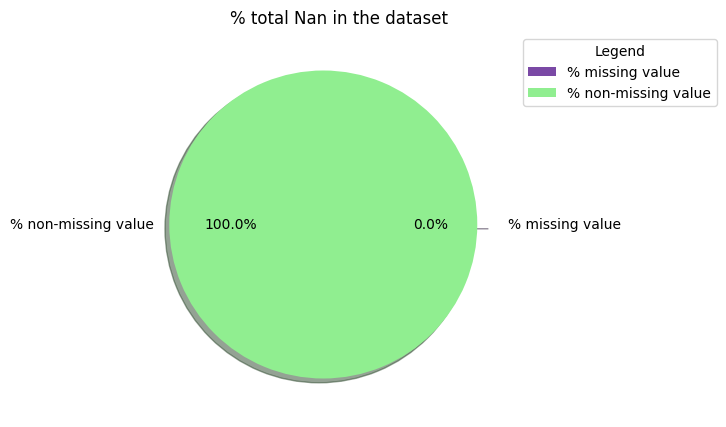

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


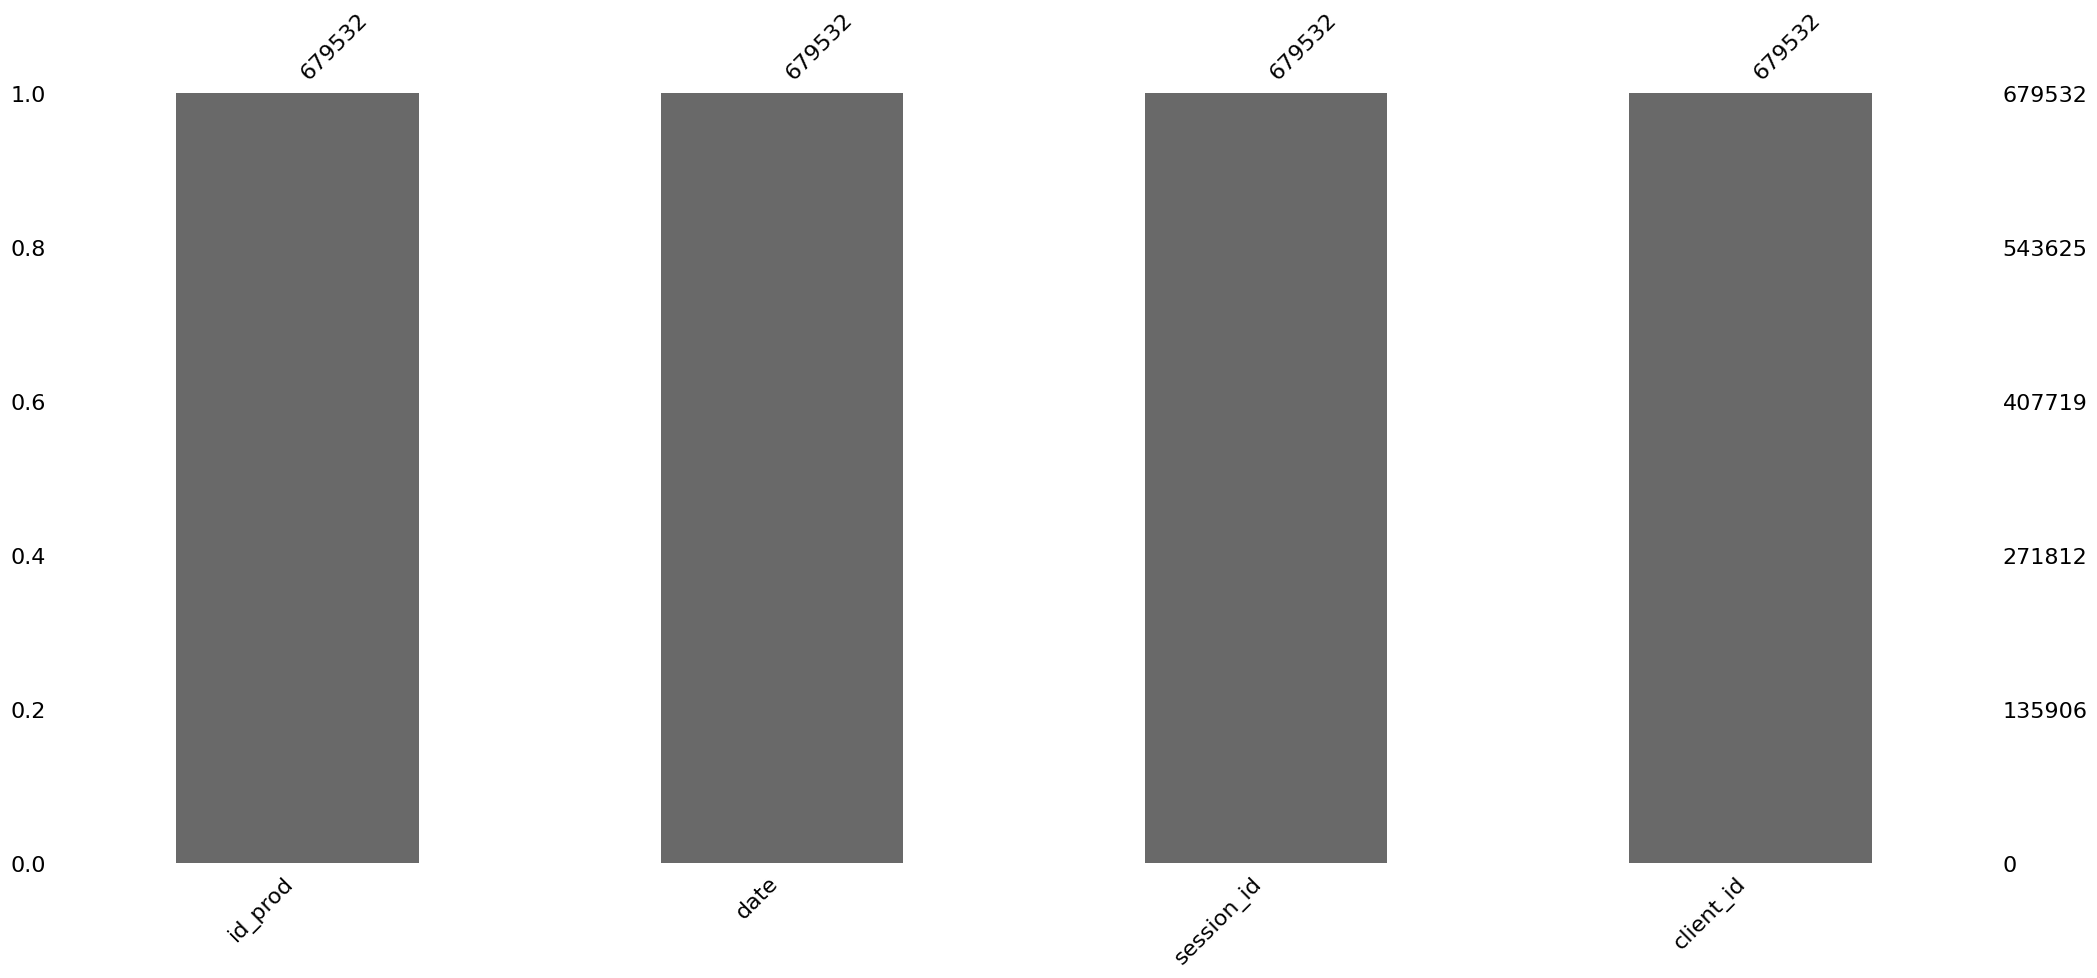

In [ ]:
data_checking(transactions)

Number of lines : 8623
Number of columns : 3
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943




Display the last 5 rows of the dataset




,client_id,sex,birth
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968
8622,c_84,f,1982




Display a summary of the dataset




,# Columns,# Rows,# Col Types,Col Types and #,Nan total %
0,3,8623,2,"[(object, 2), (int64, 1)]",0.0




Display a summary of the columns of the dataset


Dataset contains 8623 rows and 3colonnes


,Columns name,Type,# unique values,# Nan values,% Nan values
0,client_id,object,8623,0,0.0
1,sex,object,2,0,0.0
2,birth,int64,76,0,0.0




Display a summary of the types of columns in the dataset




,Type
object,2
int64,1




Percentage of missing values ​​in the dataset




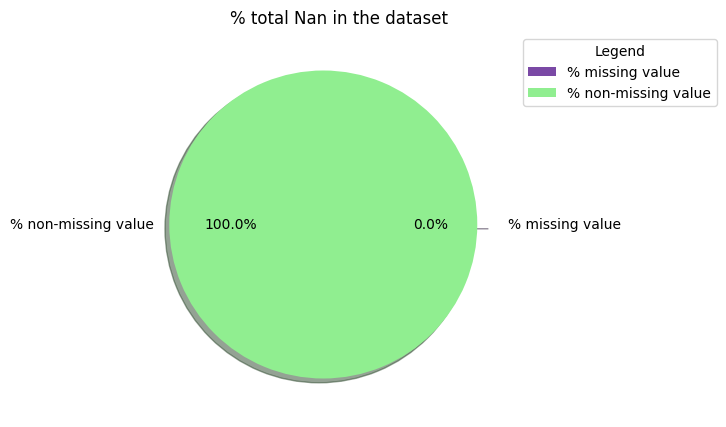

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


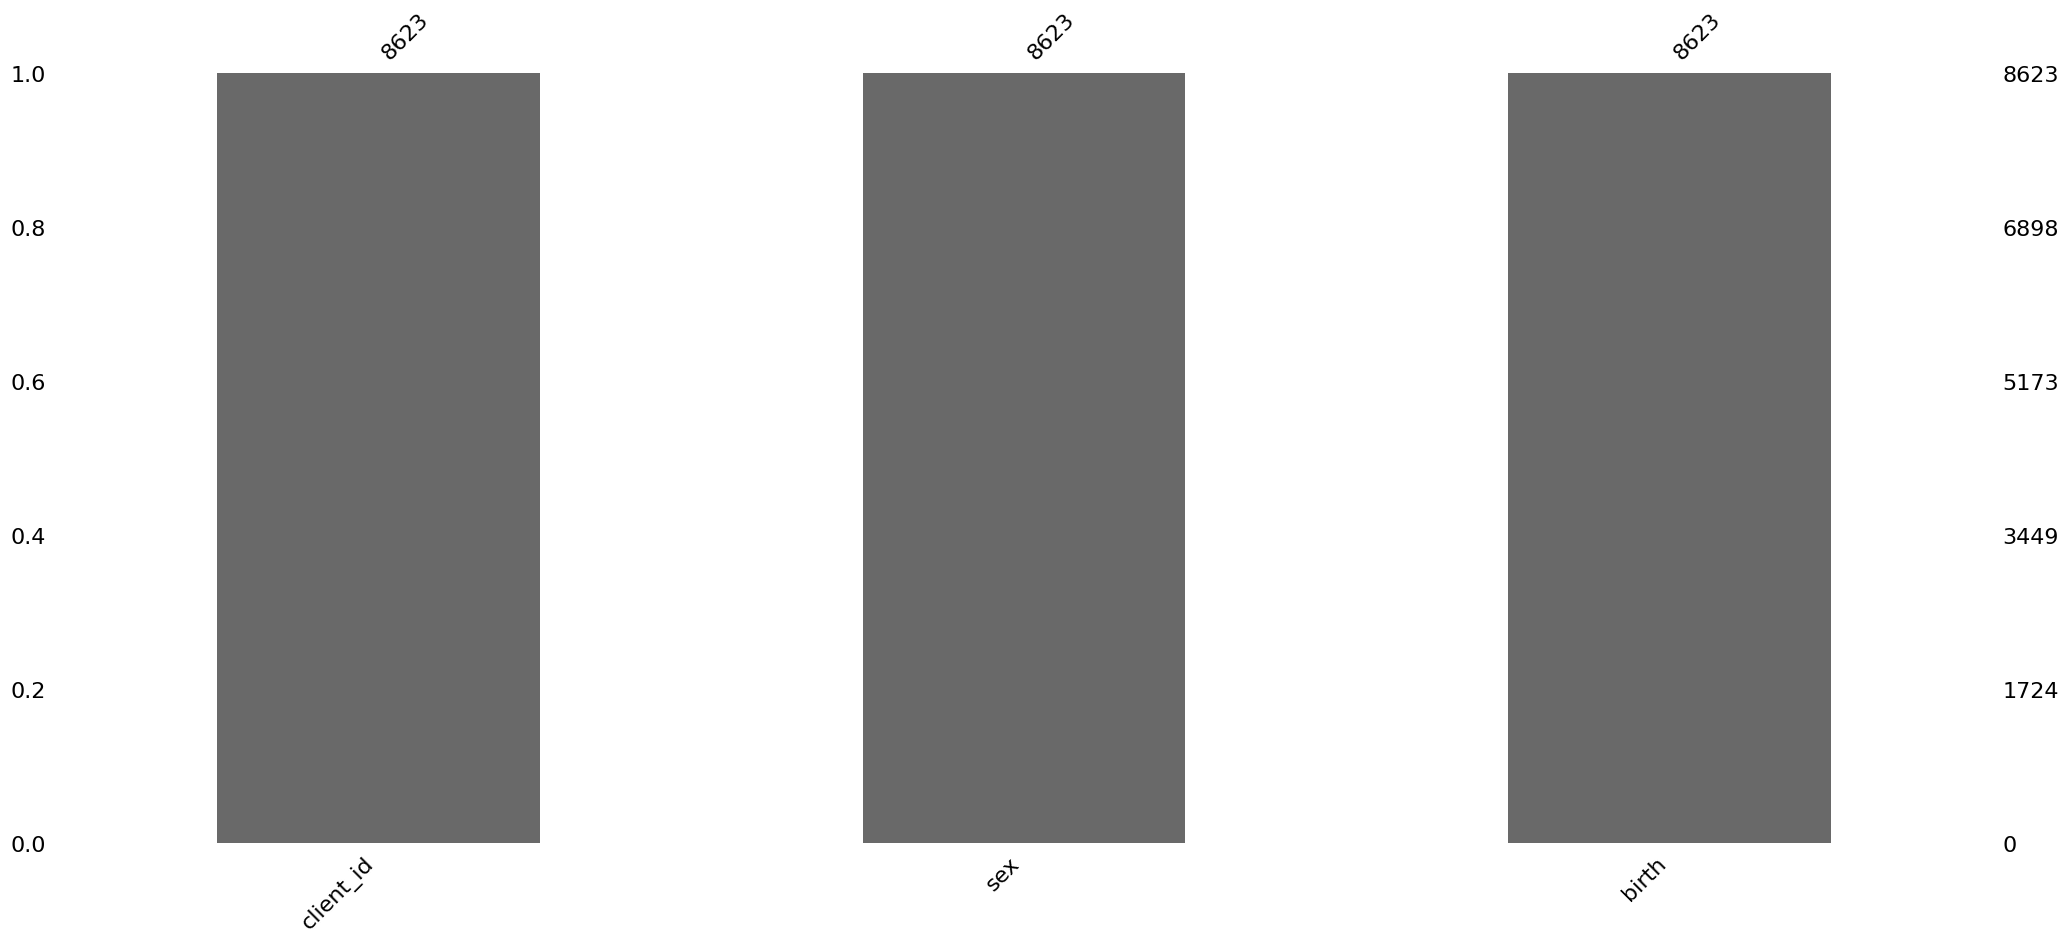

In [ ]:
data_checking(customers)

Number of lines : 3287
Number of columns : 3
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0




Display the last 5 rows of the dataset




,id_prod,price,categ
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0




Display a summary of the dataset




,# Columns,# Rows,# Col Types,Col Types and #,Nan total %
0,3,3287,3,"[(object, 1), (float64, 1), (int64, 1)]",0.0




Display a summary of the columns of the dataset


Dataset contains 3287 rows and 3colonnes


,Columns name,Type,# unique values,# Nan values,% Nan values
0,id_prod,object,3287,0,0.0
1,price,float64,1455,0,0.0
2,categ,int64,3,0,0.0




Display a summary of the types of columns in the dataset




,Type
object,1
float64,1
int64,1




Percentage of missing values ​​in the dataset




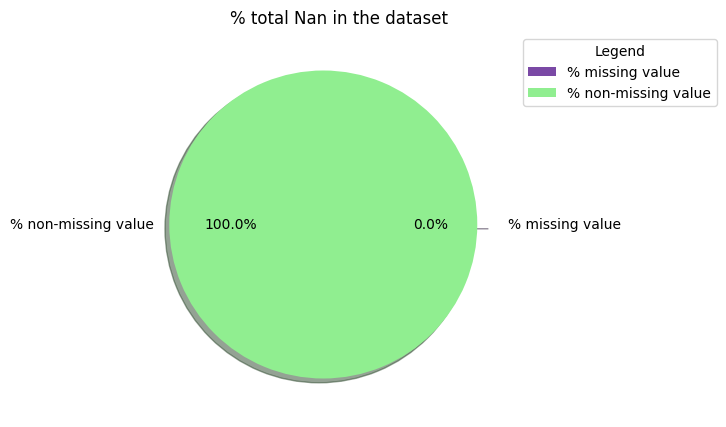

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


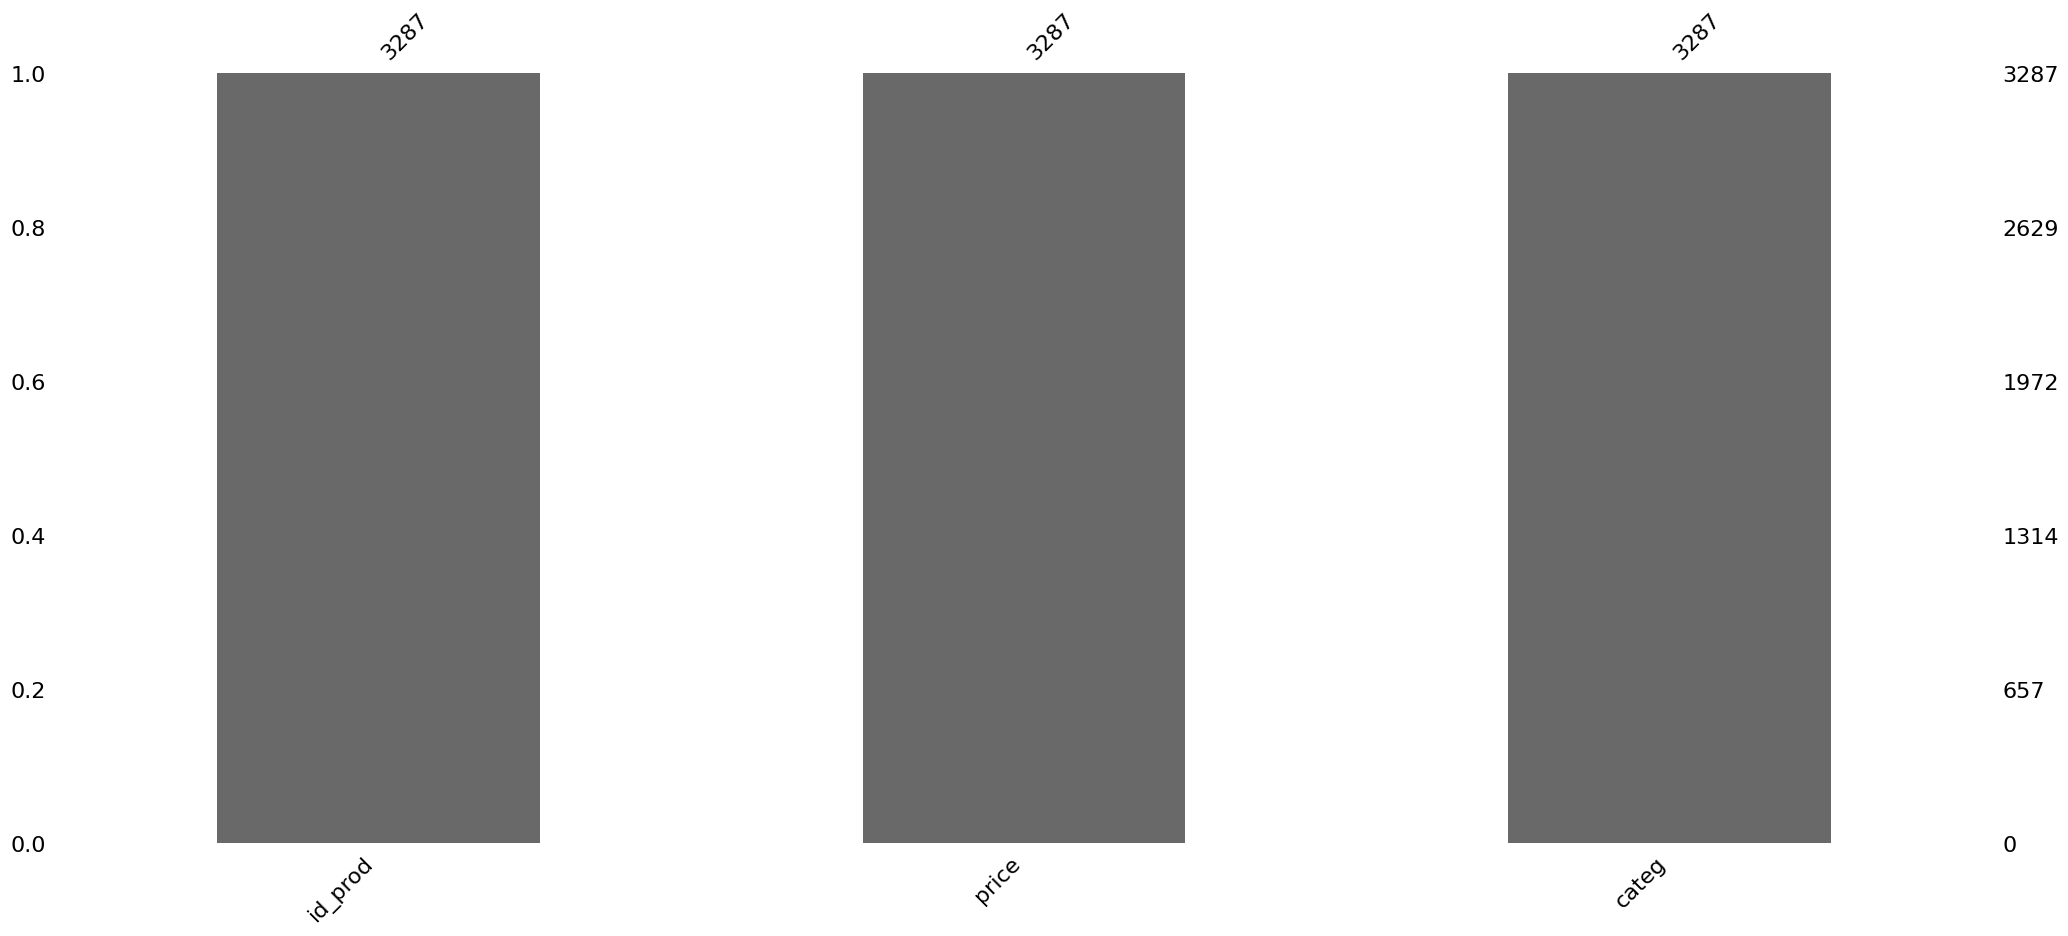

In [ ]:
data_checking(products)

**Remarks**

There are no null values present in customers data, transactions data and products data.


Transactions data has 679532 data points, which seems very large compare to the data points of other dataframes. There is possibility of duplicate points present in transactions.

To get the complete informations, we need to merge these sub dataframes to get single dataframe.


The data is in the form of a set of dataframe with different size and which contain characteristics related to the problem. We notice the presence of numerical, categorical and date time variables.

In [ ]:
# Remove the duplicates
transactions.drop_duplicates(keep="first", inplace=True)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [ ]:
# Checking duplicates in 'session_id'
duplicates_transactions = transactions.duplicated(subset=['session_id'])
print(transactions[duplicates_transactions])

       id_prod                        date session_id client_id
306     0_2192  2023-01-26 22:43:25.496864   s_332881    c_3682
375      1_379  2022-04-18 23:06:13.048219   s_196083    c_2132
832       0_30  2022-09-22 22:49:05.168711   s_272055    c_5636
1586    0_1431  2022-05-07 13:20:48.611570   s_204977    c_5782
1598    0_1417  2022-09-20 09:22:29.265383   s_270779    c_2117
...        ...                         ...        ...       ...
679523   1_190  2022-01-30 06:17:15.265379   s_157285     c_656
679525  0_1434  2022-12-14 13:18:29.143723   s_311959    c_3653
679529  0_1425  2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994  2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523  2022-09-28 01:12:01.973763   s_274568    c_3873

[337090 rows x 4 columns]


In [ ]:
# Checking duplicates in 'session_id'
transactions[transactions['session_id']=='s_196083']

,id_prod,date,session_id,client_id
113,1_451,2022-04-18 23:19:24.224849,s_196083,c_2132
375,1_379,2022-04-18 23:06:13.048219,s_196083,c_2132
149556,2_101,2022-04-18 23:27:39.050232,s_196083,c_2132


In [ ]:
# Checking duplicates in 'session_id'
transactions[transactions['session_id']=='s_311959']

,id_prod,date,session_id,client_id
22956,1_627,2022-12-14 14:23:57.806468,s_311959,c_3653
121296,0_1097,2022-12-14 13:30:12.625120,s_311959,c_3653
248538,0_1409,2022-12-14 14:08:49.212330,s_311959,c_3653
532979,1_389,2022-12-14 13:55:00.413764,s_311959,c_3653
658789,2_109,2022-12-14 14:19:29.107585,s_311959,c_3653
679525,0_1434,2022-12-14 13:18:29.143723,s_311959,c_3653


We notice that these duplicate sales sessions are for the same customer who buys several items at the same time so we will keep them.

In [ ]:
def joint_hist_boxplot(df, col, plot_type='log_scale',
                       log_scale=[True, False], kde=False,
                       set_yscale='linear', set_xscale='symlog',
                       figsize=(10, 10)):
    # Creating a figure composed of two matplotlib.
    # Axes objects (ax_box and ax_hist)
    df = df.dropna(subset=[col])
    f, (ax_box, ax_hist) = plt.subplots(nrows=2,
                                        sharex=True,
                                        gridspec_kw={"height_ratios":(.15, .85)}
                                        ,
                                        figsize=figsize)

    # Graphic properties (not very important)
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'lightgreen'}

    # Assigning a graph to each ax
    _ = sns.boxplot(data=df, x=col,
                    showfliers=True,
                    medianprops=medianprops,
                    showmeans=True,
                    meanprops=meanprops,
                    color="#7a49a5",
                    ax=ax_box)

    _ = sns.histplot(data=df,
                     x=col,
                     kde=kde,
                     color="#7a49a5",
                     ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Distribution of the variable ' + col)
    plt.show()

    # Calculate variable stats
    df_stats = df[col].describe().to_frame()
    print()
    display(df_stats)
    print('-'*100)
    print('-'*100)

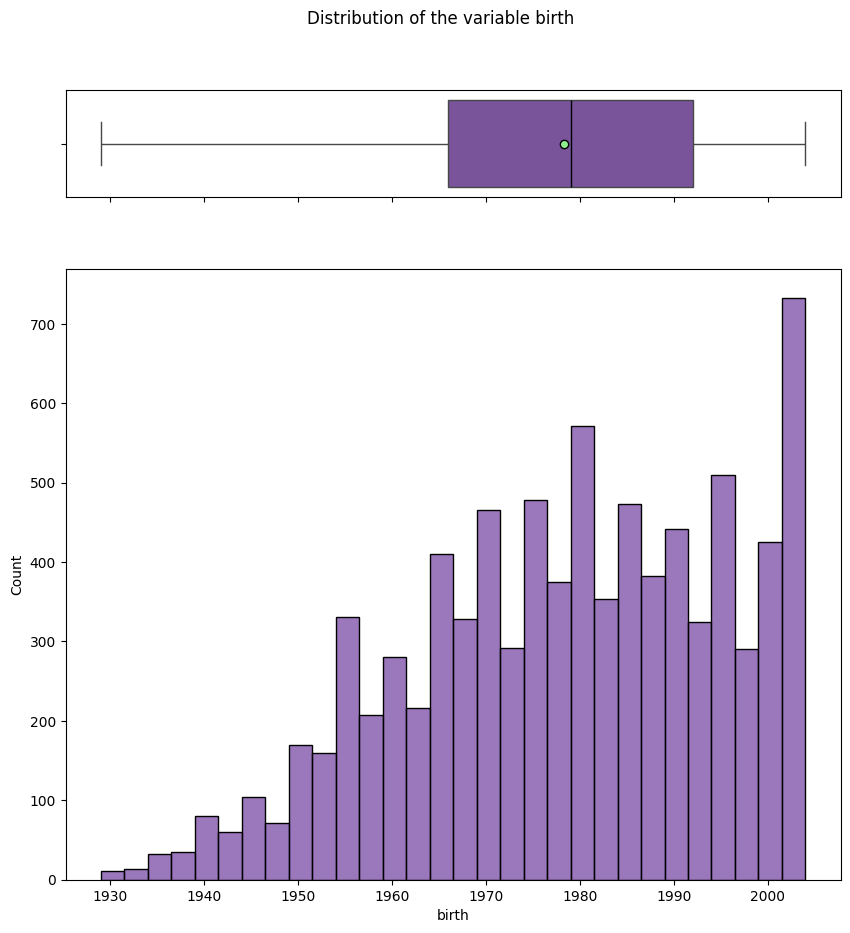

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
for col in customers.select_dtypes(include=np.number).columns:
    joint_hist_boxplot(customers, col)

We notice that our customers vary in age, but those born in 1980 and 2003 are more present than the others.

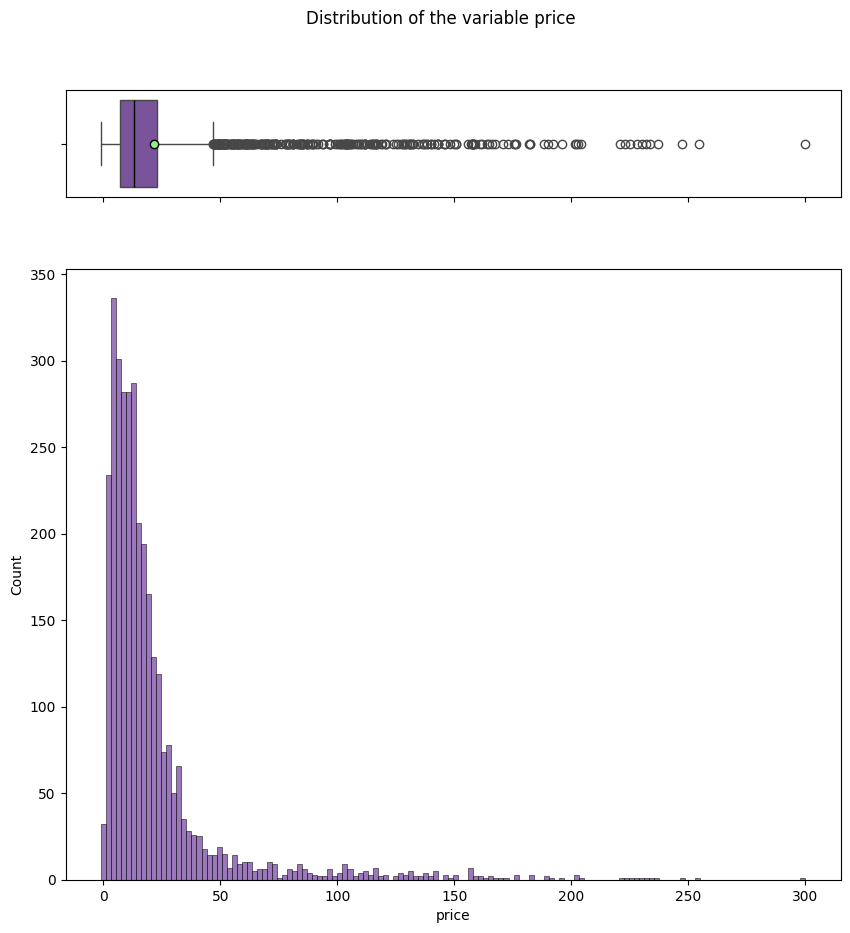

,price
count,3287.000000
mean,21.856641
std,29.847908
min,-1.000000
25%,6.990000
50%,13.060000
75%,22.990000
max,300.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


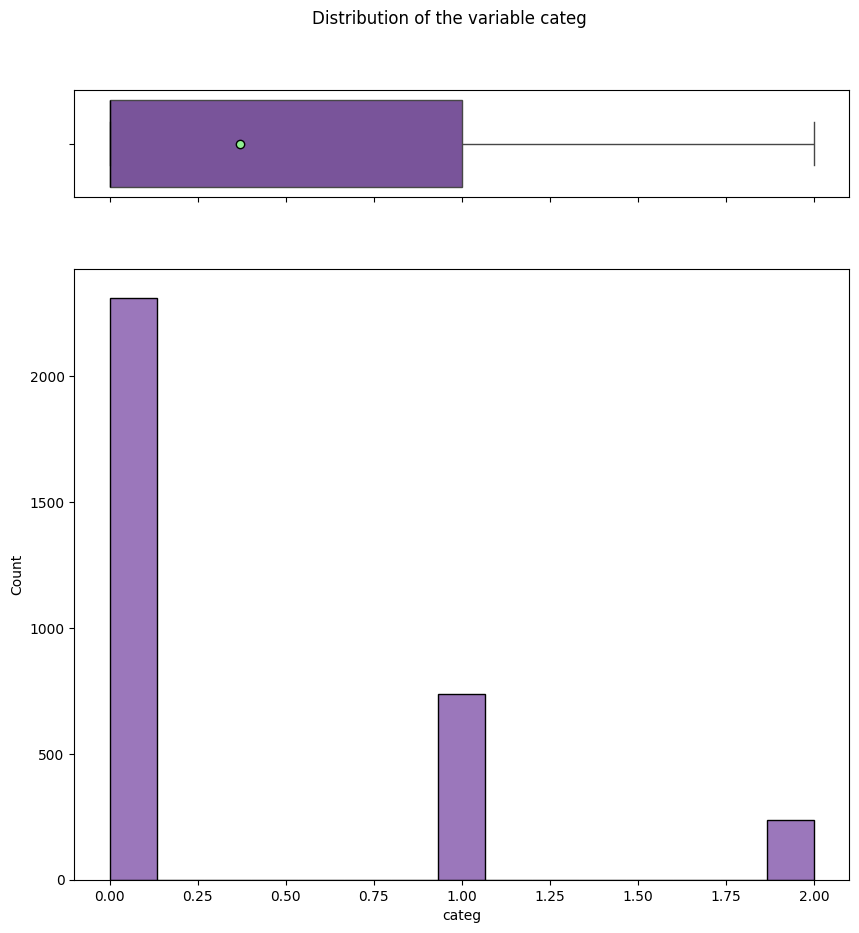

,categ
count,3287.000000
mean,0.370246
std,0.615387
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
for col in products.select_dtypes(include=np.number).columns:
    joint_hist_boxplot(products, col)

We notice:

* The price variable presents values which vary from -1 to 300 euros, and statistical outliers due to the variability of the books offered.
It is necessary to correct the value -1 which is not logical.

* The category variable presents 3 categories 0, 1 and 3. The most sold category is category 0.

In [ ]:
# Consulting outliers in the 'price' column

# Calculation of the IQR
Q1 = products['price'].quantile(0.25)
Q3 = products['price'].quantile(0.75)
IQR = Q3 - Q1

# Definition of limits for outliers
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR

# Identification of outliers in the 'price' variable
outliers = products[(products['price'] > sup) |\
                    (products['price'] < inf)]

outliers_list = outliers['price'].tolist()

print("List of outliers:", outliers_list)

List of outliers: [225.17, 51.92, 72.11, 47.22, 107.99, 157.99, 157.99, 201.74, 49.99, 156.99, 134.57, 157.99, 158.17, 127.99, 60.39, 79.04, 60.37, 88.99, 70.51, 167.49, 62.99, 111.99, 103.99, 71.99, 56.99, 82.99, 65.75, 157.42, 115.3, 47.99, 50.99, 52.26, 57.04, 72.42, 68.99, 61.23, 247.22, 59.11, 83.99, 86.99, 162.03, 127.39, 60.99, 67.57, 48.99, 89.43, 69.99, 51.99, 104.78, 116.98, 130.99, 49.04, 170.99, 48.99, 67.57, 73.99, 109.99, 77.99, 131.99, 145.45, 130.99, 175.99, 254.44, 66.99, 73.72, 96.56, 48.63, 86.99, 228.11, 181.99, 78.83, 52.99, 80.99, 73.18, 57.45, 103.92, 106.52, 79.99, 54.99, 84.29, 93.99, 75.81, 172.99, 110.08, 78.05, 48.99, 300.0, 47.83, 98.99, 191.99, 55.99, 55.99, 61.38, 55.79, 58.99, 116.99, 86.99, 157.63, 52.99, 110.98, 68.49, 64.85, 80.99, 89.54, 57.91, 83.51, 155.99, 46.99, 118.51, 49.99, 55.89, 80.99, 60.87, 104.06, 69.99, 203.99, 73.62, 145.99, 142.99, 123.99, 176.2, 62.99, 175.67, 62.99, 163.94, 104.76, 53.99, 236.99, 100.56, 111.72, 71.21, 50.99, 60.99, 

In [ ]:
# Display of data equivalent to outliers
data_outliers = products[products['price'].isin(outliers_list)]

print("Data equivalent to outliers:")
data_outliers

Data equivalent to outliers:


,id_prod,price,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


It should be noted that these are statistical outliers due to the diversity of the books offered.

In [ ]:
# Consulting negative 'price'
products[products['price'] <0]

,id_prod,price,categ
731,T_0,-1.0,0


In [ ]:
transactions[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


For this 'id_prod' T_0 which shows a negative price, we notice
that the id_prod are test id, we will delete these 74 lines.

In [ ]:
# Delete lines where 'id_prod' is equal to 'T_0'
products = products.drop(products[products['id_prod'] ==\
                                                 'T_0'].index)

products[products['price'] <0]

,id_prod,price,categ


In [ ]:
# Consulting duplicates in the 'id_prod' column
duplicates_products = products.duplicated(subset=['id_prod'])
print(products[duplicates_products])

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


No doubled values ​​in the id_prod column.

In [ ]:
# Consulting duplicates in the 'client_id' column
duplicates_client_id = customers.duplicated(subset=['client_id'])
print(customers[duplicates_client_id ])

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


No doubled values ​​in the client_id column.

Now we will consolidate data from transactions and customers into a single dataframe.

In [ ]:
# Merge tables on the client_id column
merged_table = pd.merge(transactions, customers, on='client_id', how='left')

print("Merged table:")
merged_table

Merged table:


,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980
...,...,...,...,...,...,...
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986


Number of lines : 679406
Number of columns : 6
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980




Display the last 5 rows of the dataset




,id_prod,date,session_id,client_id,sex,birth
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986
679405,1_523,2022-09-28 01:12:01.973763,s_274568,c_3873,m,1995




Display a summary of the dataset




,# Columns,# Rows,# Col Types,Col Types and #,Nan total %
0,6,679406,2,"[(object, 5), (int64, 1)]",0.0




Display a summary of the columns of the dataset


Dataset contains 679406 rows and 6colonnes


,Columns name,Type,# unique values,# Nan values,% Nan values
0,id_prod,object,3267,0,0.0
1,date,object,679371,0,0.0
2,session_id,object,342316,0,0.0
3,client_id,object,8602,0,0.0
4,sex,object,2,0,0.0
5,birth,int64,76,0,0.0




Display a summary of the types of columns in the dataset




,Type
object,5
int64,1




Percentage of missing values ​​in the dataset




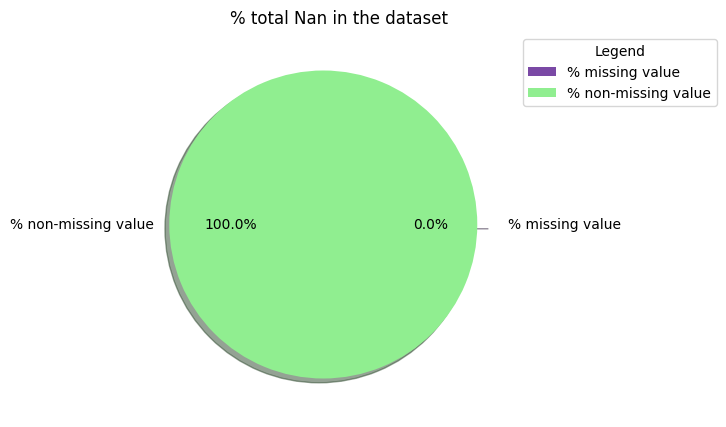

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


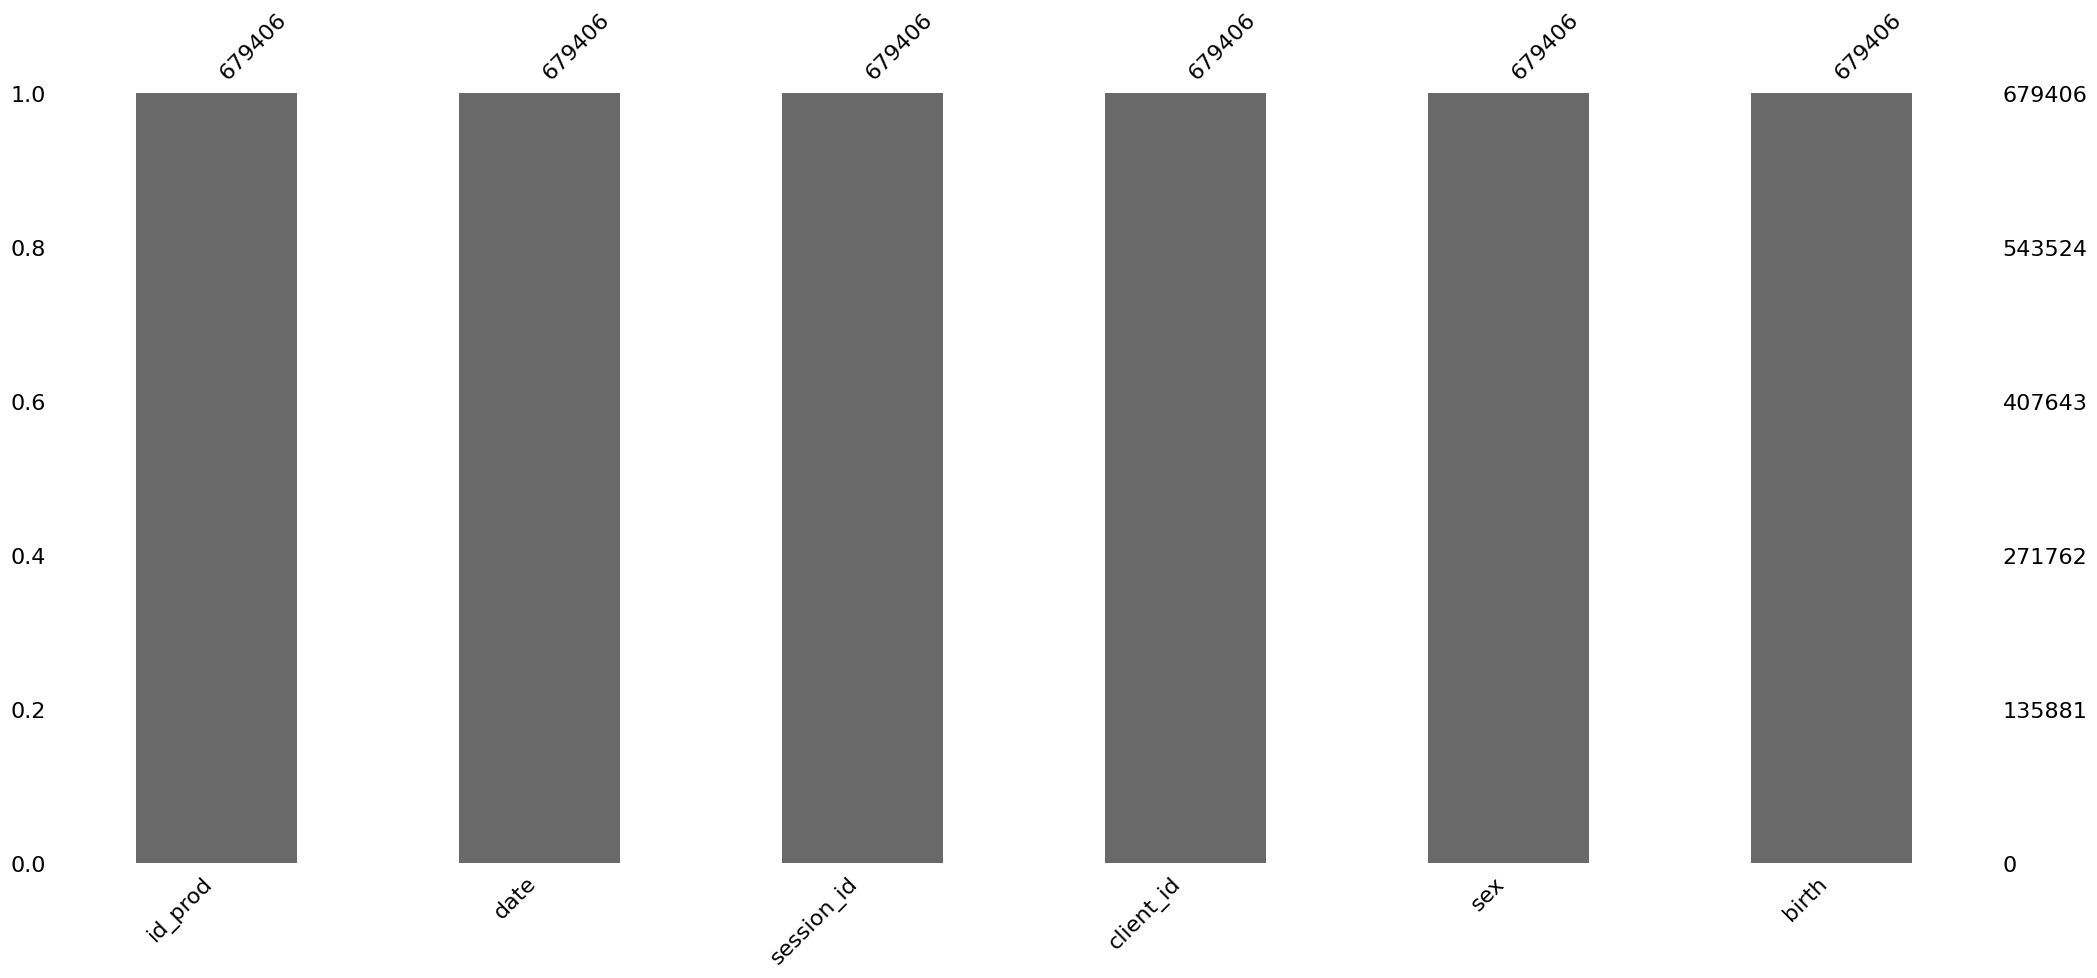

In [ ]:
# Consulting the merged table
data_checking(merged_table)

We will consolidate data from merged_table and products into a single dataframe.

In [ ]:
# Merge tables on the client_id column
merged_table_ = pd.merge(merged_table, products, on='id_prod', how='inner')

print("Merged table_:")
merged_table_

Merged table_:


,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,m,1985,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,f,1974,4.18,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,f,1962,4.18,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,f,1976,4.18,0
...,...,...,...,...,...,...,...,...
679106,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,m,1984,20.99,0
679107,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,f,1974,2.99,0
679108,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,f,1981,2.99,0
679109,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,f,1966,21.82,0


Number of lines : 679111
Number of columns : 8
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,m,1985,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,f,1974,4.18,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,f,1962,4.18,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,f,1976,4.18,0




Display the last 5 rows of the dataset




,id_prod,date,session_id,client_id,sex,birth,price,categ
679106,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,m,1984,20.99,0
679107,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,f,1974,2.99,0
679108,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,f,1981,2.99,0
679109,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,f,1966,21.82,0
679110,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,m,1991,2.99,0




Display a summary of the dataset




,# Columns,# Rows,# Col Types,Col Types and #,Nan total %
0,8,679111,3,"[(object, 5), (int64, 2), (float64, 1)]",0.0




Display a summary of the columns of the dataset


Dataset contains 679111 rows and 8colonnes


,Columns name,Type,# unique values,# Nan values,% Nan values
0,id_prod,object,3265,0,0.0
1,date,object,679111,0,0.0
2,session_id,object,342275,0,0.0
3,client_id,object,8600,0,0.0
4,sex,object,2,0,0.0
5,birth,int64,76,0,0.0
6,price,float64,1442,0,0.0
7,categ,int64,3,0,0.0




Display a summary of the types of columns in the dataset




,Type
object,5
int64,2
float64,1




Percentage of missing values ​​in the dataset




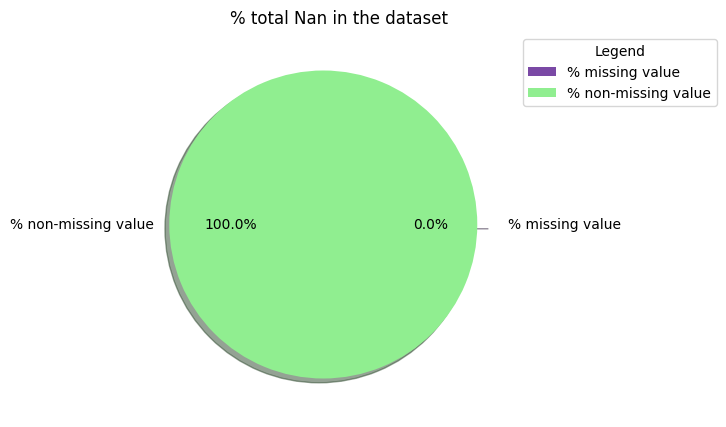

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


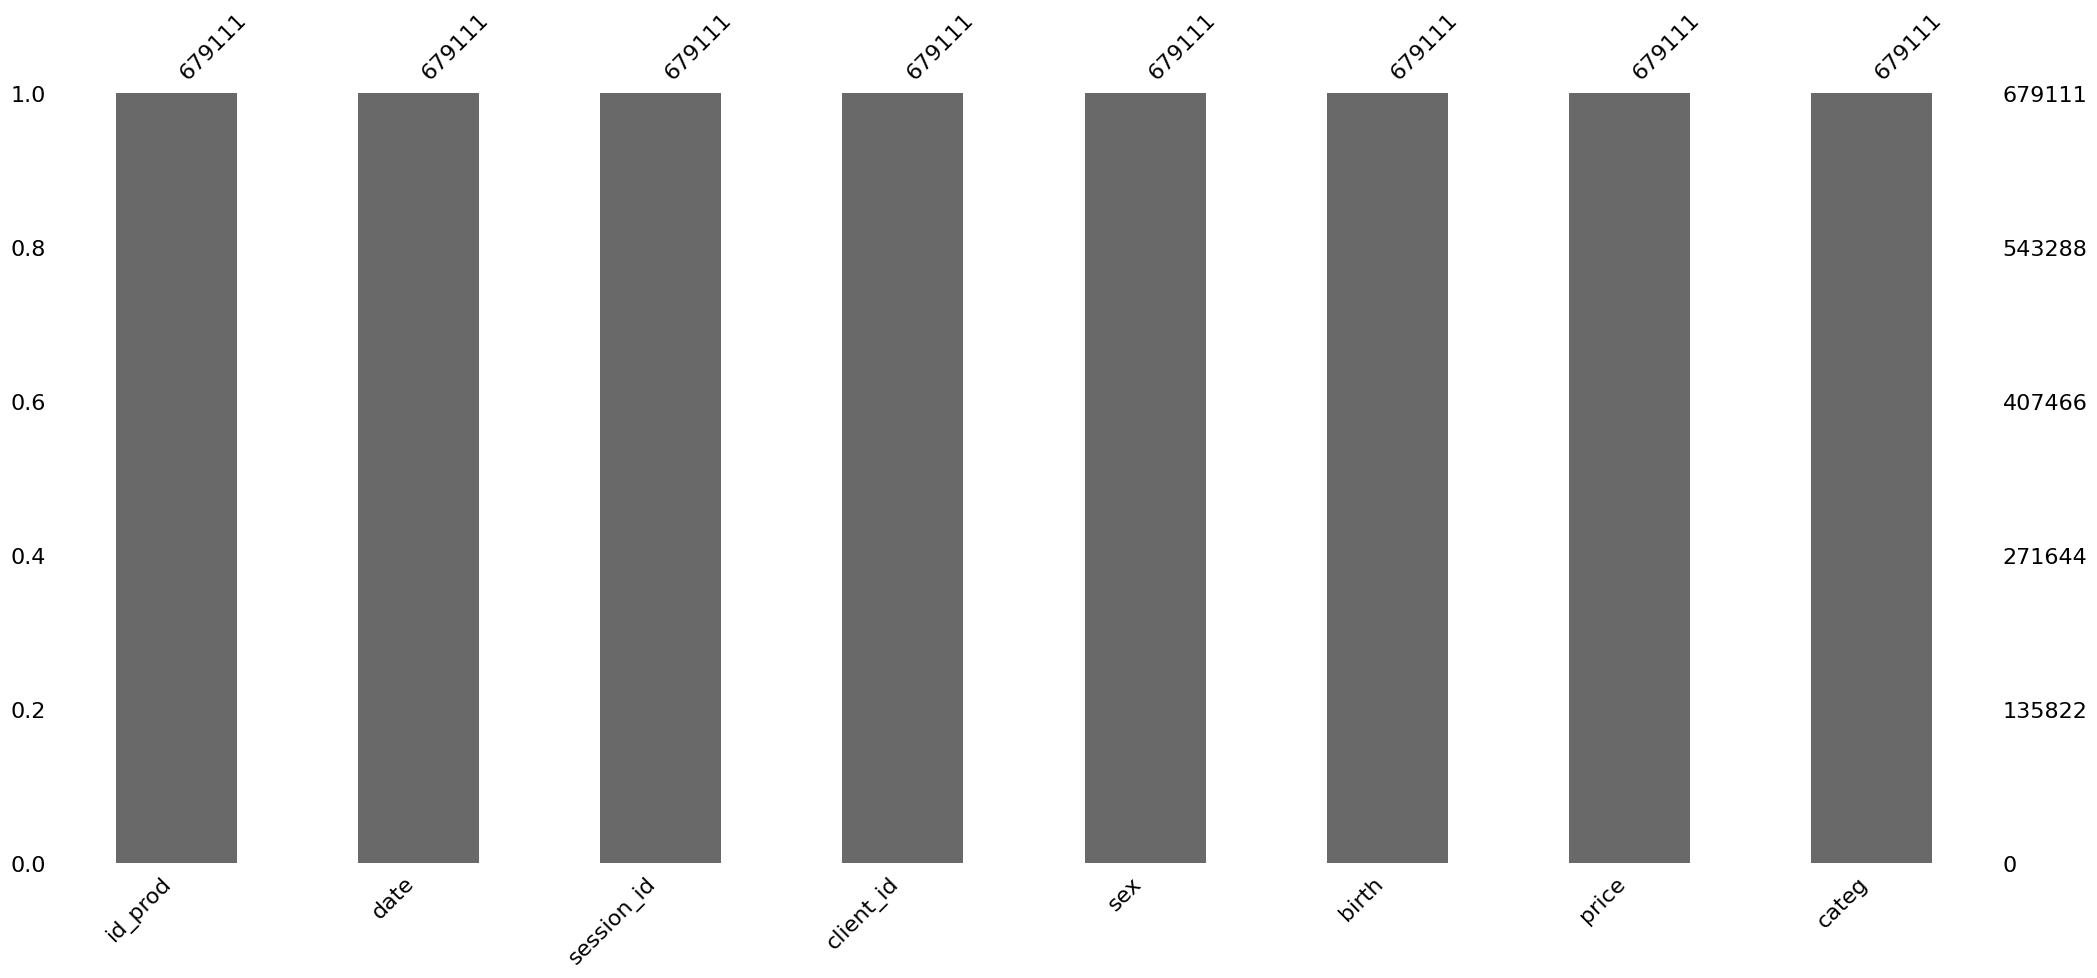

In [ ]:
# Consulting the new table
data_checking(merged_table_)

We obtained a dataframe consisting of 8 columns and 679111 rows without any missing values.

# 3.Analysis of different sales indicators

Regarding the data analysis planned shortly, several aspects must be covered.

Firstly, we will need different indicators and graphs around the
turnover.

We will also look at the evolution over time and put in place a
moving average decomposition to assess the overall trend.

It would also be interesting to zoom in on the references, to see the tops and the
flops, distribution by category, etc.

Finally, we will have some information on the profiles of our customers, and also the
distribution of turnover between them, for example via a Lorenz curve.

**3.1.Univariate analysis**

**The 'price' variable**

Let's visualize the distribution of the 'price' column


<ipython-input-41-fa6f3750d7c2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_table_['price'])


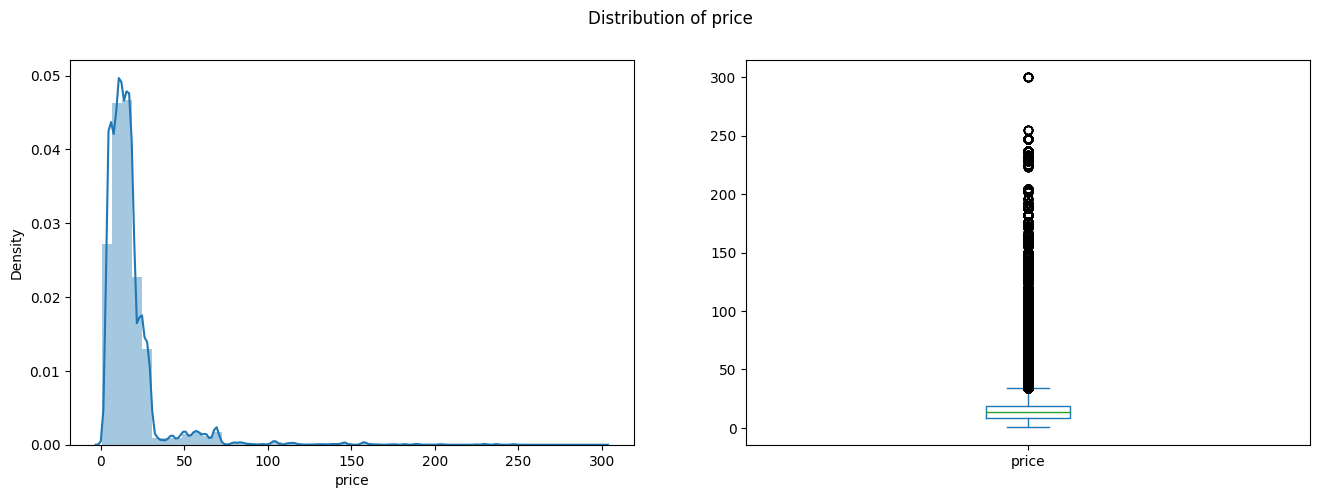

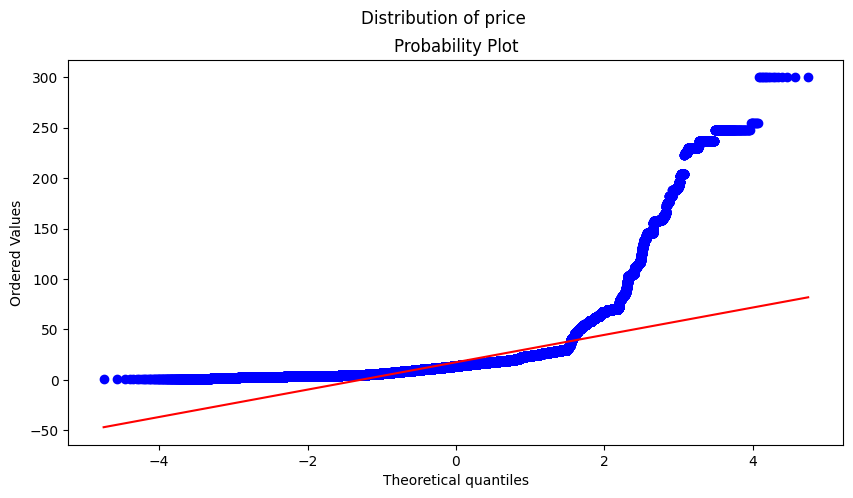

In [ ]:
plt.figure(1)

plt.subplot(121)
sns.distplot(merged_table_['price'])
plt.suptitle('Distribution of price')

plt.subplot(122)
merged_table_['price'].plot.box(figsize=(16,5))

fig, ax = plt.subplots(figsize=(10, 5))
stats.probplot(merged_table_['price'], plot=ax)

plt.suptitle('Distribution of price')
plt.show()

As we have already noticed, the price variable shows statistical outliers and it does not follow a normal law.

To confirm the non-normality of the 'price' variable we will apply a statistical test: the **Shapiro_Wilk** test.

Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

So we will start with a null hypothesis (H0) which is: the variable 'price' follows a normal law.

In [ ]:
# Apply the Shapiro-Wilk test
statistic, p_value = shapiro(merged_table_['price'])

# Show the results
print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"P-value : {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The variable 'price' appears to follow a normal distribution\
     (the null hypothesis is not rejected).")
else:
    print("The variable 'price' probably does not follow a normal distribution\
     (the null hypothesis is rejected)")

Shapiro-Wilk test statistic: 0.5473446846008301
P-value : 0.0
The variable 'price' probably does not follow a normal distribution     (the null hypothesis is rejected)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


So the null hypothesis H0 is rejected because the p_value < 0.05 and as expected, the 'price' variable does not follow a normal distribution.

**The 'categ' variable**

Let's visualize the distribution of the various product categories

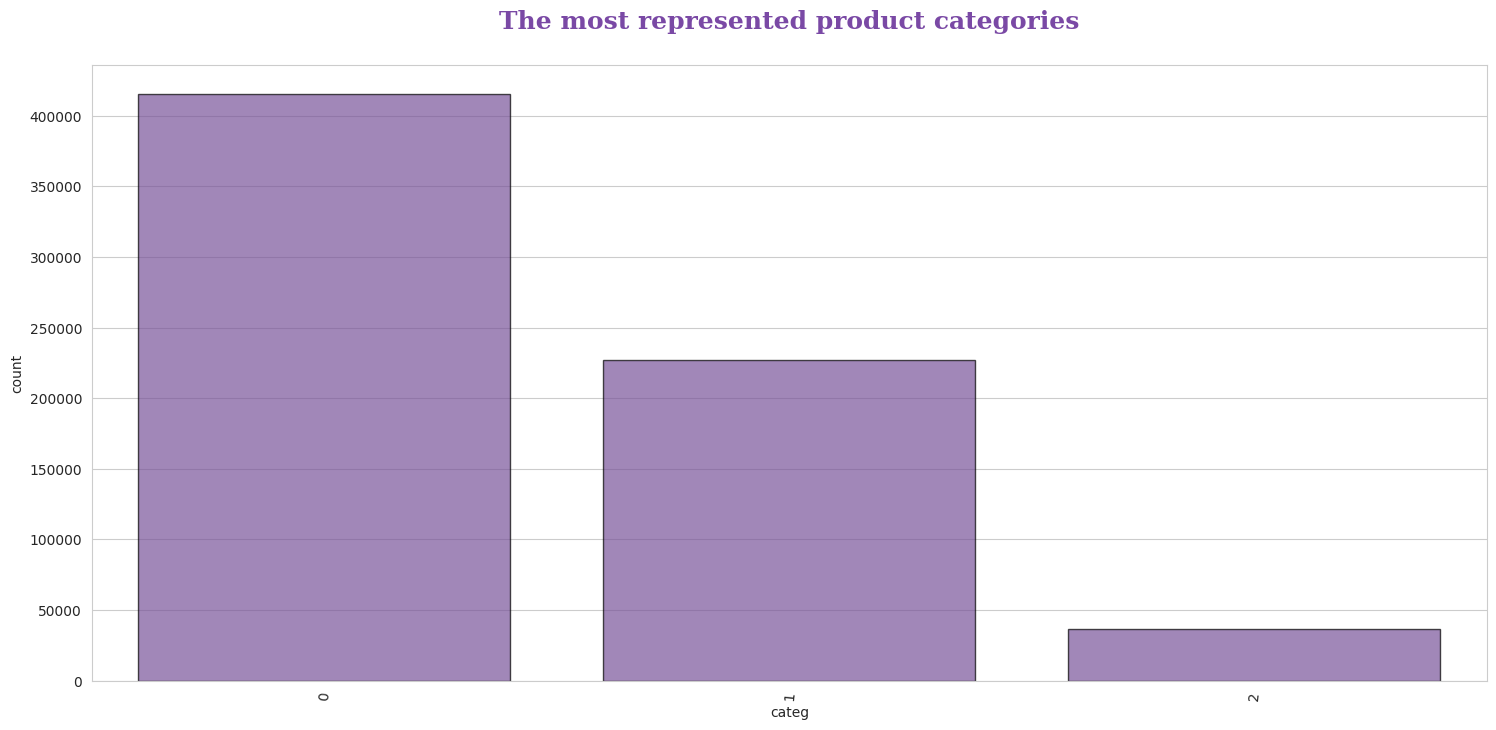

In [ ]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#7a49a5",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=merged_table_, x="categ",
              edgecolor="black",
              color="#7a49a5", alpha=0.7)
plt.xticks(range(0, merged_table_["categ"].nunique()),
                    merged_table_["categ"].unique(),
                    rotation=85)
plt.title(f"The most represented product categories\n",
          fontdict=font_title)
plt.show()

The most represented product category is the category 0 with plus then 2000 products.

**The 'date' variable**

In [ ]:
# Before conversion
print("Before conversion:")
print(merged_table_.dtypes)

# Converting "date" column to date type with error handling
merged_table_['date'] = pd.to_datetime(merged_table_['date'], errors='coerce')

# After conversion
print("\nAfter conversion:")
print(merged_table_.dtypes)

Before conversion:
id_prod        object
date           object
session_id     object
client_id      object
sex            object
birth           int64
price         float64
categ           int64
dtype: object

After conversion:
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
price                float64
categ                  int64
dtype: object


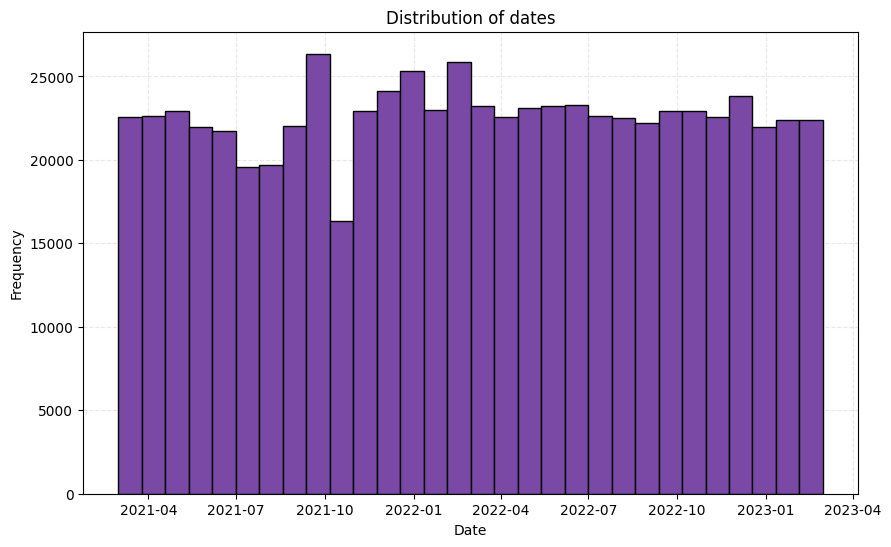

In [ ]:
# Enable grid and specify border color between bars
plt.figure(figsize=(10, 6))
plt.hist(merged_table_['date'], bins=30, color='#7a49a5', edgecolor='black',
         zorder=2)

# Enable background grid with higher density
plt.grid(True, linestyle='--', alpha=0.3, which='both', zorder=1)

plt.title('Distribution of dates')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Show plot
plt.show()

We notice a peak in September 2021 and two others in January and March 2022.

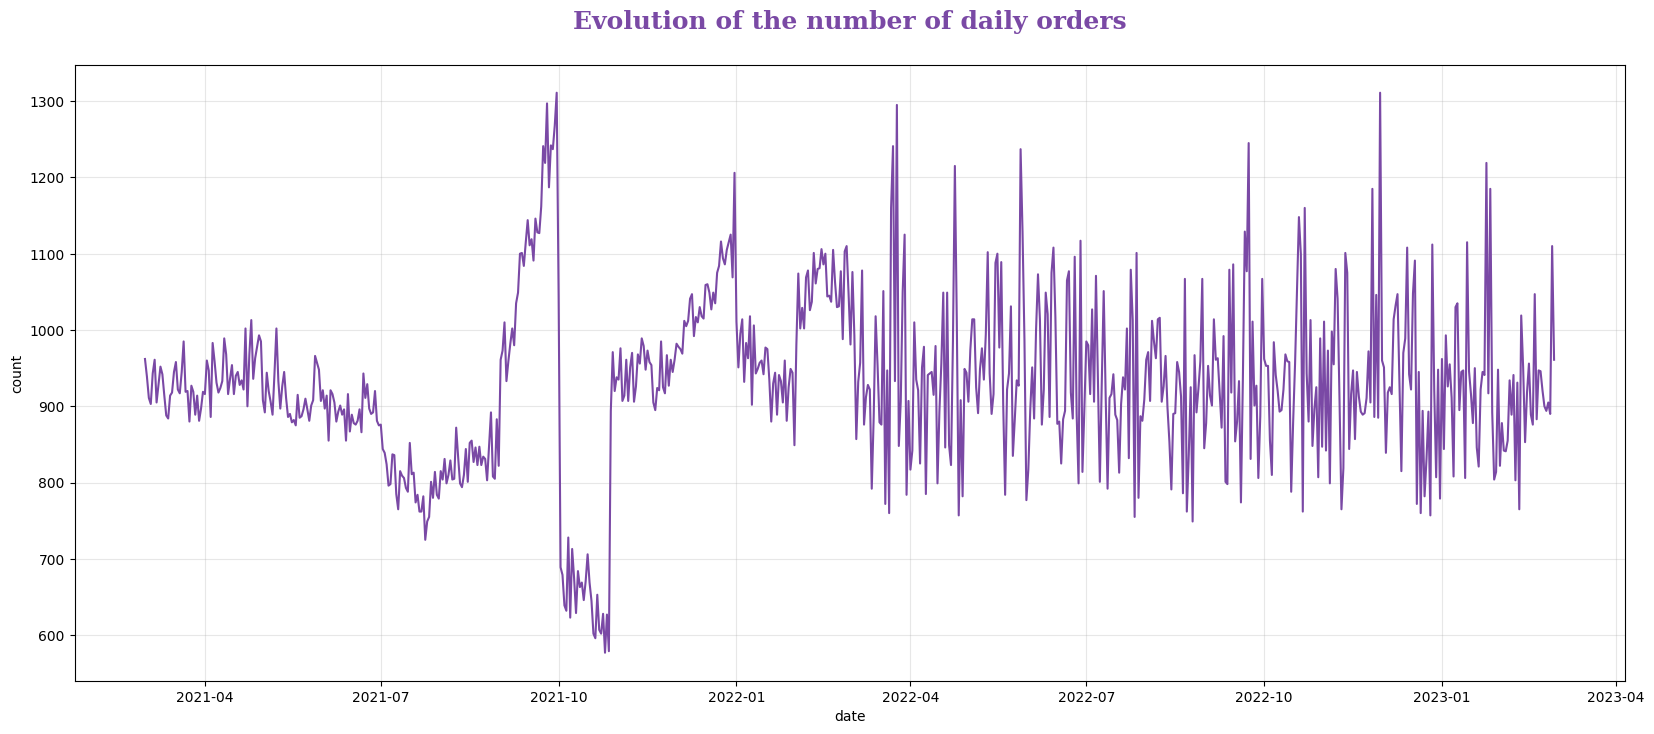

In [ ]:
# Consulting the evolution of the number of daily orders
orders_per_days = merged_table_.groupby(merged_table_["date"]\
                                    .dt.date)\
                                    .count()["session_id"]
fig = plt.figure(figsize=(20, 8))

# Set the font_title variable
font_title = {"family": "serif", "color": "#7a49a5", "weight": "bold",
              "size": 18}
ax = orders_per_days.plot(color="#7a49a5")
plt.grid(True, linestyle='-', alpha=0.3, which='both', zorder=1)
ax.set_ylabel("count")
plt.title(f"Evolution of the number of daily orders\n",
          fontdict=font_title)
plt.show()

We note that sales increased in September 2021 then a significant drop was observed in October of the same year. Sales then increased again at the start of 2022 and stabilized until 2023.

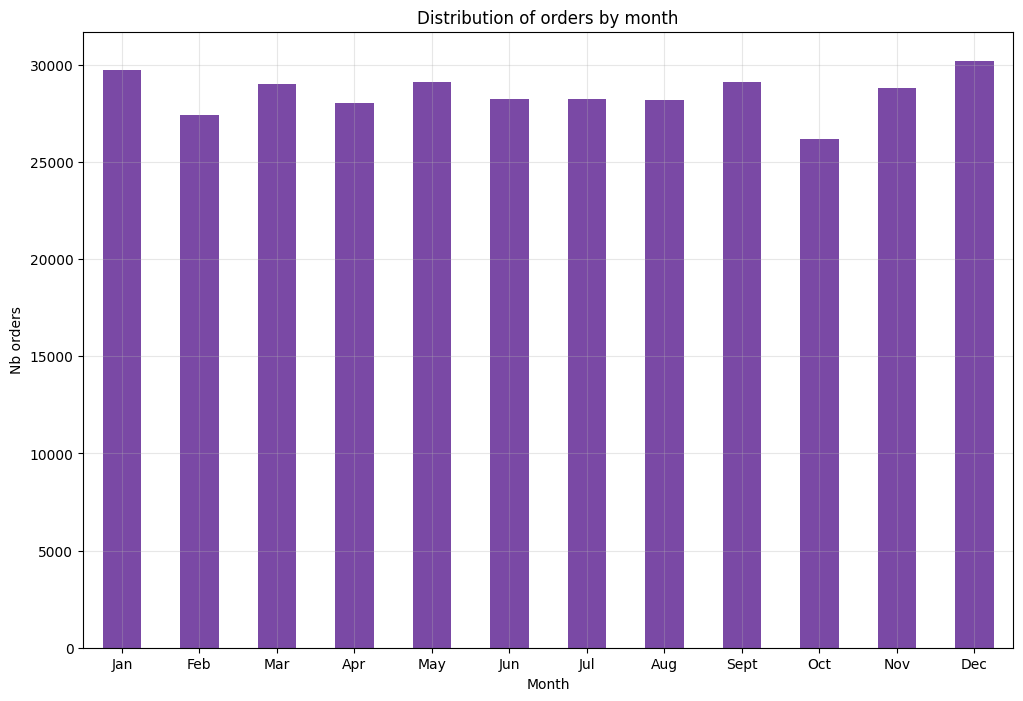

In [ ]:
# Consulting the distribution of orders by month
merged_table_.groupby(merged_table_['date'].dt.month)\
    .agg({"session_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",color="#7a49a5",
          title="Distribution of orders by month",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'],
           rotation='horizontal')

plt.grid(True, linestyle='-', alpha=0.3, which='both', zorder=1)
plt.show()

We notice that the months January, March, May, September and December are the months during which we buy more books.

Now, we will test the normality of the 'date' variable according to the Shapiro-Wilk statistical test.

We will start with a null hypothesis (H0) which is: the variable 'date' follows a normal law.

In [ ]:
# Calculate time intervals between dates
merged_table_['time_interval'] = merged_table_['date'].diff().dt.days

# Apply the Shapiro-Wilk test on time intervals
statistic, p_value = shapiro(merged_table_['time_interval'].dropna())

# Show the results
print(f"Statistique de test de Shapiro-Wilk : {statistic}")
print(f"P-value : {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The time intervals appear to follow a normal distribution\
      (null hypothesis is not rejected).")
else:
    print("The time intervals probably do not follow a\
      normal distribution (null hypothesis is rejected).")


Statistique de test de Shapiro-Wilk : 0.9931203722953796
P-value : 0.0
The time intervals probably do not follow a      normal distribution (null hypothesis is rejected).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We notice that the p_value < 0.05 so the null hypothesis H0 is rejected and the 'date' variable does not follow a normal distribution.

**The 'age' variable**

We will determine the age of each customer based on the 'birth' variable.

In [ ]:
# Get current year
current_year = datetime.now().year

# Calculate age by subtracting year of birth from current year
merged_table_['age'] = current_year - merged_table_['birth']

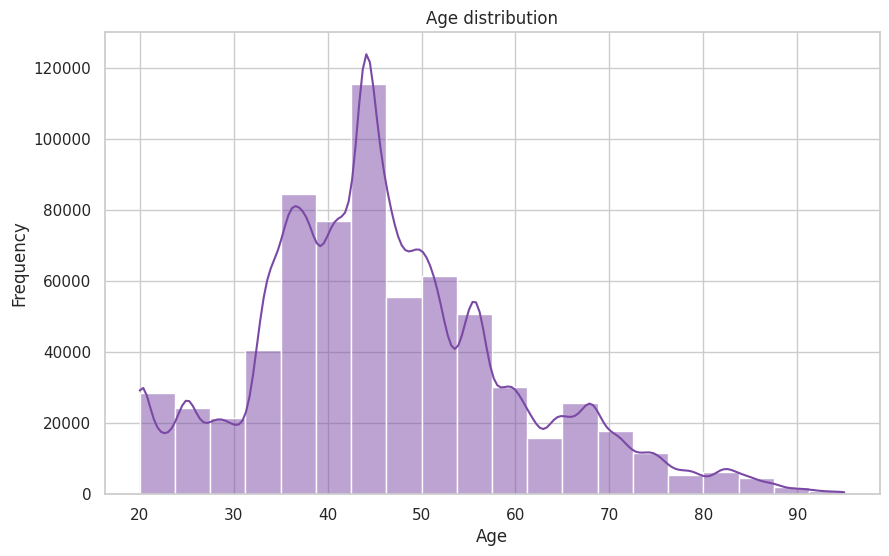

In [ ]:
# Plot the histogram
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(merged_table_['age'], bins=20, kde=True, color="#7a49a5")
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can clearly see that the 40 to 50 age group represents the group that buys the most books.

**The 'sex' variable**

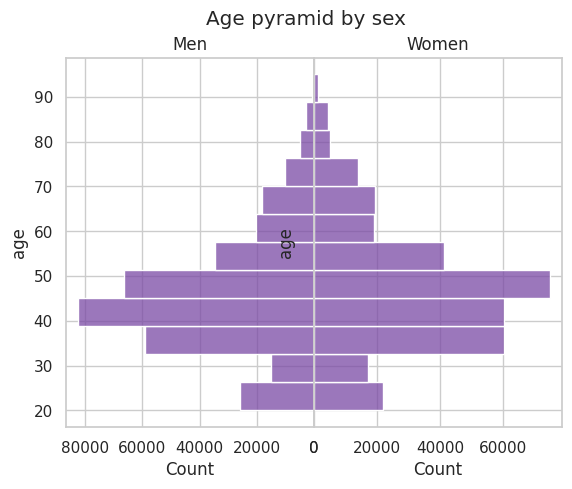

In [ ]:
g, axes = plt.subplots(1, 2)
fig.suptitle('Age pyramid by sex')

sns.histplot(ax=axes[0], y=merged_table_[merged_table_['sex']=='m']['age'],
             bins=12, color="#7a49a5")
axes[0].invert_xaxis()
axes[0].set_title('Men')

sns.histplot(ax=axes[1], y=merged_table_[merged_table_['sex']=='f']['age'],
             bins=12, color="#7a49a5")
axes[1].set_yticklabels([])
axes[1].set_title('Women')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

We notice that our clientele is distributed equally between males and females.

**3.2.Bivariate Analysis**



The objective is to understand the behavior of our customers online, to then be able to compare with the knowledge acquired through our physical bookstores.

**Correlations**

Now we will see if there are strong linear correlations in the dataset.

This is a particularly useful statistical measure which makes it possible to study the relationship between two variables based on the calculation of a correlation coefficient. Correlation corresponds to the strength (indicated by the absolute value of the coefficient) as well as the direction (indicated by the sign of the coefficient) of the relationship between these variables. The direction can be either positive (as x increases, y also increases) or negative (as x increases, y decreases or vice versa). There are several types of correlations.

<ipython-input-30-d5062b862327>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(merged_table_.corr(),
<ipython-input-30-d5062b862327>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(merged_table_.corr(),
<ipython-input-30-d5062b862327>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecati

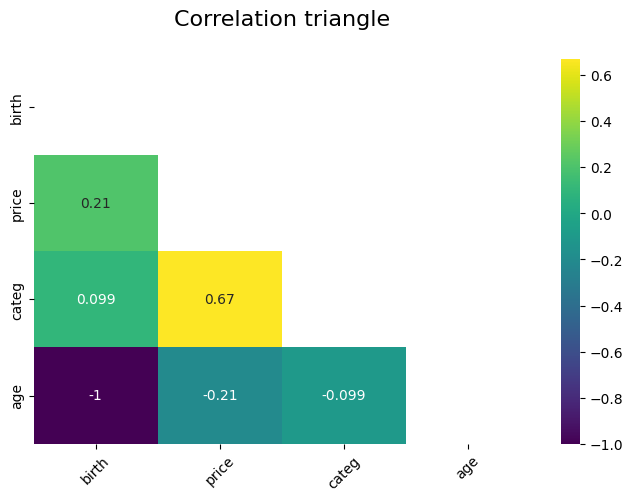

In [ ]:
# Correlation triangle
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(merged_table_.corr(),
                      mask=np.triu(np.ones_like(merged_table_.corr(),
                                                           dtype=np.bool)),
                      annot=True, cmap='viridis')
heatmap.set_title('Correlation triangle', fontdict={'fontsize':16}, pad=24)
plt.xticks(rotation=45)
plt.show()

The correlation triangle displays the relationships between different variables in our dataset. Each square in the grid represents the correlation between two variables, with values ranging from -1 to 1. Colors indicate the strength and direction of the correlation, with cooler tones representing a positive correlation and warmer tones representing a negative correlation. In our data we notice a slight correlation between the two variables price and category and a negative correlation between the price and the age variables.

But we will deepen the study of these correlations via statistical tests.

**The 'price' and 'categ' variables**

<ipython-input-29-271f2e908de9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_table_, y='categ', x='price', orient='h',


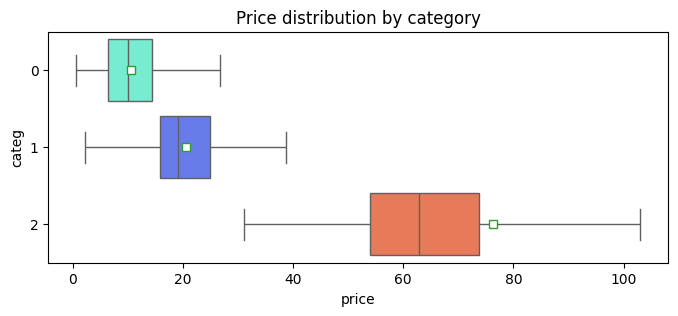

In [ ]:
# Distribution and average of prices by category
plt.figure(figsize=(8,3))
sns.boxplot(data=merged_table_, y='categ', x='price', orient='h',
            showfliers=False, showmeans=True,
            palette=["#64ffda", "#536dfe", "#ff6e40"],
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Price distribution by category')
plt.show()

We note that category 2 products have the highest prices between the different categories.

**'The price' and 'age' variables**

To test the correlation between these two quantitative variables we will use the **Spearman test**.

Spearman's correlation is a correlation measure that measures a monotonic relationship between two variables based on the rank of the data. An example of determining the rank of data is: [58,70,40] becomes [2,1,3]. Spearman correlation is often used for data consisting of outliers.

We will start with a hypothesis H0: there is no correlation between the two variables

In [ ]:
# Spearman correlation test
correlation, p_value = spearmanr(merged_table_['price'], merged_table_['age'])
r_squared = correlation**2

print("Spearman's correlation coefficient:", correlation)
print("P-value:", p_value)
print("Determination coefficient (R²):", r_squared)

Spearman's correlation coefficient: -0.05491533807185324
P-value: 0.0
Determination coefficient (R²): 0.003015694355545934


In summary, the results (correlation coefficient close to 0 and R² very close to 0) suggest a very weak and negative correlation between the two variables, with limited explanation of the variance by this correlation.

The p_value=0 indicates that we can reject the null hypothesis of no significant correlation.

This can be interpreted as an existing of a relationship between the variables.

Text(0, 0.5, 'Total amount of purchases')

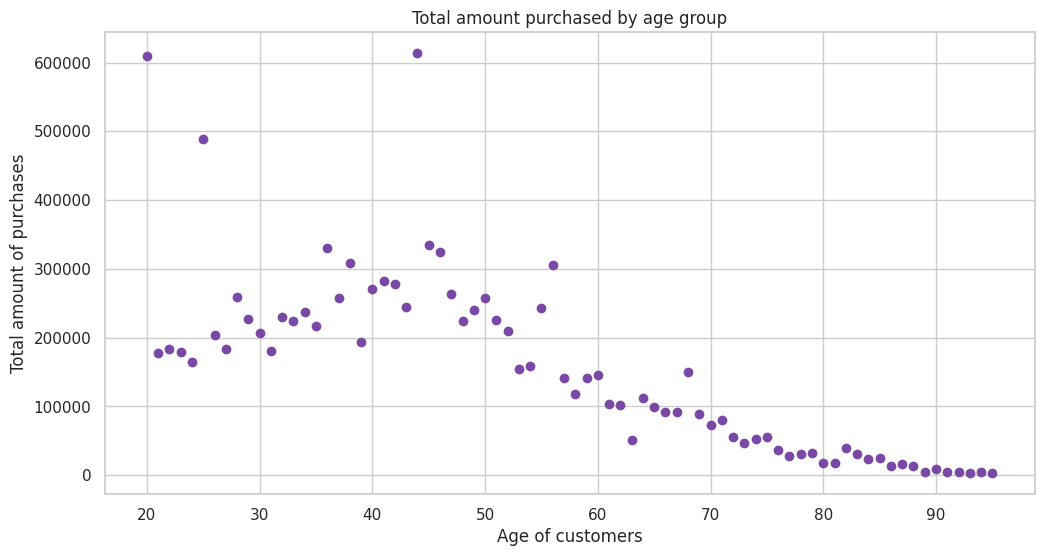

In [ ]:
# Link between customer age and total purchase amount
total_purchase_by_age = merged_table_.groupby('age')['price'].sum()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(total_purchase_by_age.index, total_purchase_by_age.values,
            color="#7a49a5")
plt.title("Total amount purchased by age group")
plt.xlabel('Age of customers')
plt.ylabel('Total amount of purchases')

We note that adults between 20 and 55 years old constitute the age group that spends the most and that seniors aged 60 and over spend the least. With a few exceptions for 20, 25 and 44 years old which show a very high total purchase amount.

Text(0, 0.5, 'Purchase frequency')

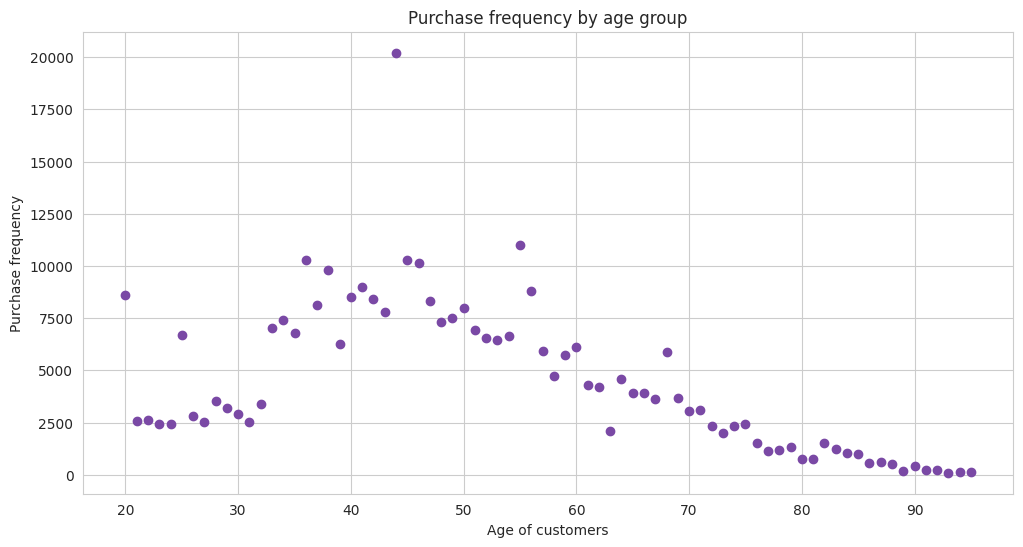

In [ ]:
# Link between customer age and purchasing frequency
purchase_frequency_by_age = merged_table_.groupby('age')['session_id'].nunique()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(purchase_frequency_by_age.index, purchase_frequency_by_age.values,
            color="#7a49a5")
plt.title("Purchase frequency by age group")
plt.xlabel('Age of customers')
plt.ylabel('Purchase frequency')

We note that the age group 33-70 years old is the group which makes the most orders and that the other groups 20-33 years old and over 70 years old present the customers who make the least purchases.

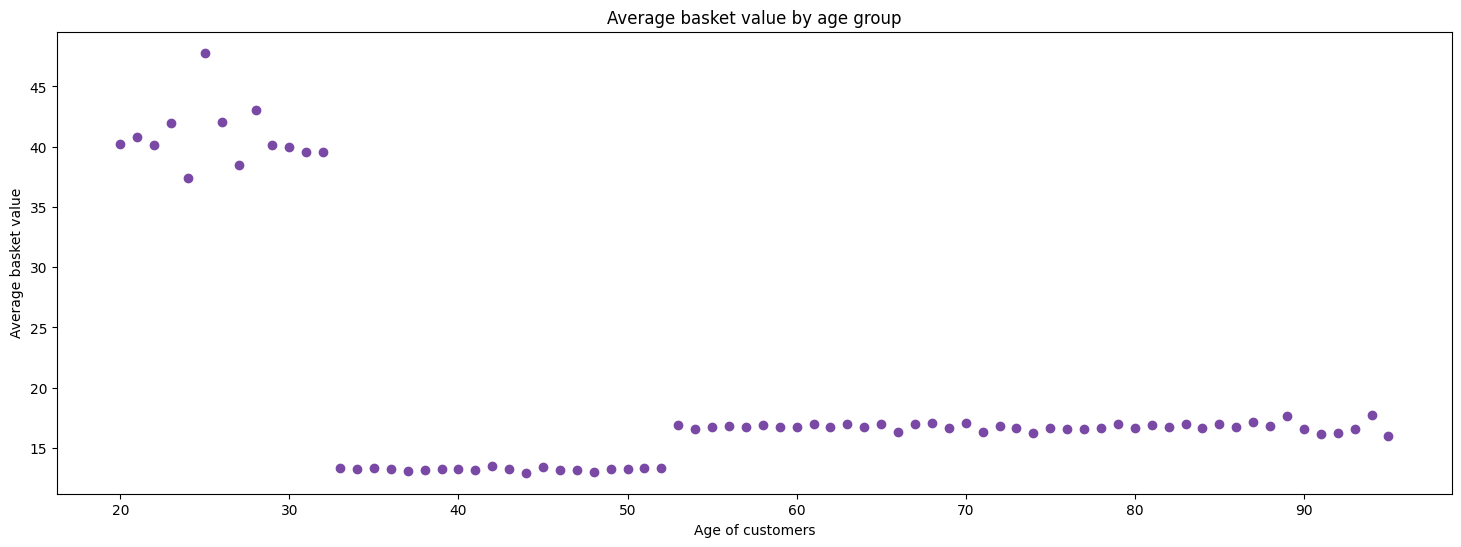

In [ ]:
# Link between customer age and average basket value
average_basket_value_by_age = merged_table_.groupby('age')['price'].mean()

# Plot the graphs
plt.figure(figsize=(18, 6))
plt.scatter(average_basket_value_by_age.index,
            average_basket_value_by_age.values,
            color="#7a49a5")
plt.title("Average basket value by age group")
plt.xlabel('Age of customers')
plt.ylabel('Average basket value')
plt.show()


From this graph we see that:

* 20-33 years old is the age group of customers who purchase with a low frequency but with a high average per basket (>35 euros)

* 33-53 years old is the age group of customers who purchase with a high frequency but with a very low average per payment (<15 euros)

* Over 53 years old is the age group of customers who buy with a very low frequency but with an average average per basket (15 < <20 euros)

**The 'sex' and 'categ' variables**

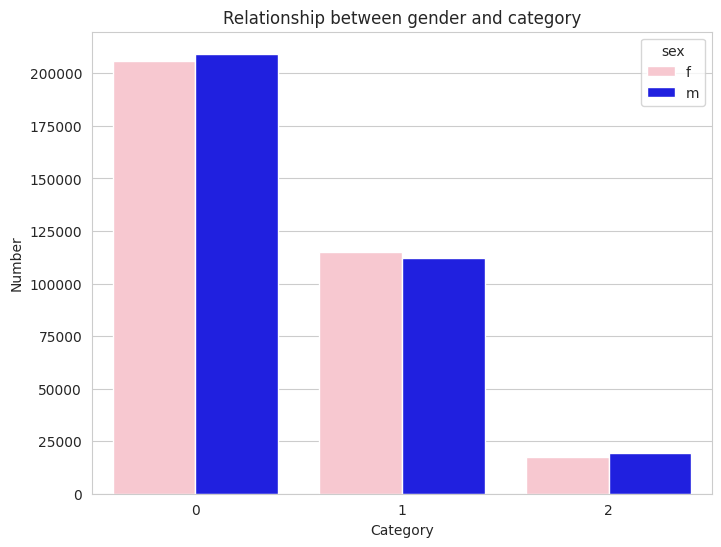

In [ ]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='categ', hue='sex', data=merged_table_,
              palette={'f': 'pink', 'm': 'blue'})
plt.title('Relationship between gender and category')
plt.xlabel('Category')
plt.ylabel('Number')
plt.show()

We note that for categories 0 and 2 the customers are mainly men and for category 1 women are the majority customers.
We will now test the correlation between these two variables using the **Chi2 test**.

The chi2 test is a hypothesis test used for categorical variables with a nominal or ordinal measurement scale. The chi-square test checks whether the observed frequencies in the sample differ significantly from the expected frequencies. The observed frequencies are therefore compared to the expected frequencies and their deviations are examined.

We will start with the following two hypotheses:

H0: The category of book sold does not depend on the gender of the customer.

H1: The category of book sold depends on the gender of this customer.

In [ ]:
# Create a contingency table between 'sex' and 'categ'
contingency_table = pd.crosstab(merged_table_['sex'], merged_table_['categ'])

# Apply the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Show the results
print(f"Statistique du test du Chi-carré : {chi2}")
print(f"P-value : {p}")

# Interpret the results
alpha = 0.05
if p > alpha:
    print("There is no significant association between 'sex' and 'categ'\
     (null hypothesis is not rejected).")
else:
    print("There is a significant association between 'sex' and 'categ'\
     (null hypothesis is rejected).")


Statistique du test du Chi-carré : 147.11906816131497
P-value : 1.1310980597090762e-32
There is a significant association between 'sex' and 'categ'     (null hypothesis is rejected).


In [ ]:
# Show the contingency_table
contingency_table

categ,0,1,2
sex,,,
f,206103,114899,17283
m,209356,112270,19200


We notice that p_value < 0.05 therefore the null hypothesis H0 is rejected and we can say that the category of book sold depends on the sex of the customer. It is concluded that there is sufficient evidence to say that the variables 'sex' and 'categ' are associated.

**The 'age' and 'categ' variables**



<ipython-input-100-d580468c9b2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='categ', y='age', data=merged_table_, palette='pastel')


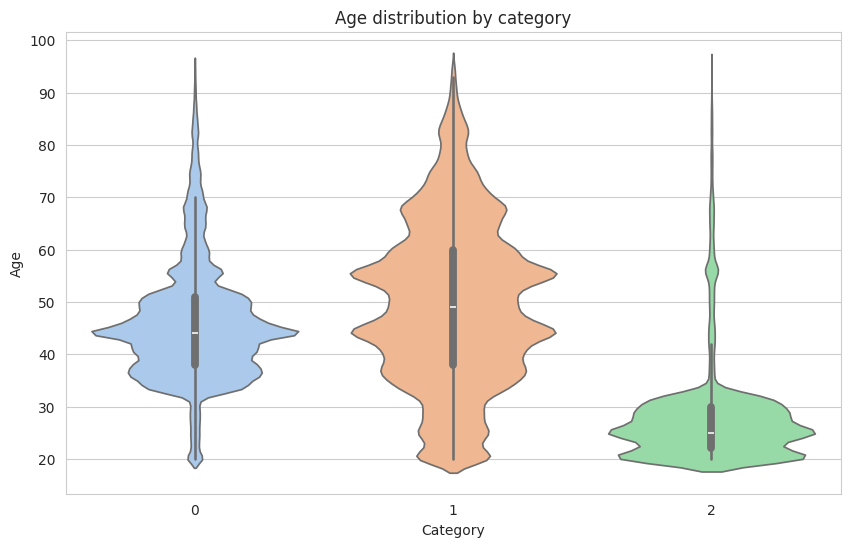

In [ ]:
# Create a violin chart
plt.figure(figsize=(10, 6))
sns.violinplot(x='categ', y='age', data=merged_table_, palette='pastel')
plt.title('Age distribution by category')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()

We notice from the graph that:

* For category 0, customers are adults aged 30 to 50.
* For category 1, customers are more dispersed, ranging from 25 to 65 years old.
* For category 2, customers are young people aged 20 to 30.

Statistically, we can test whether the average age varies between different product categories. To do this, we can use the analysis of variance **ANOVA** which tests whether there are statistically significant differences between two samples.

Or to use ANOVA, each group should approximately follow a normal distribution. However, we know that the two variables do not follow the normal distribution.

In [ ]:
# Average price per category
merged_table_.groupby('categ').mean()['age']

<ipython-input-31-7a4b28b10d01>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_table_.groupby('categ').mean()['age']


categ
0    45.897446
1    49.651238
2    27.948031
Name: age, dtype: float64

**The 'age and 'sex' variables**

We wish to compare the average ages between two distinct sex groups (men and women) using the **student test** which, also known as the t statistic or sometimes the t distribution, is a popular statistical tool used to test differences between the means (means) of two groups, or the difference between a group's mean and a standard value. Running a t-test helps to understand whether the differences are statistically significant.

But before using the student test, the assumptions of equality of variance and normality must be verified.

We will start with the hypotheses H0 which assume the normality and equality of variances of our data.

In [ ]:
# Normality test for men
statistic_male, p_value_male = shapiro(merged_table_[merged_table_['sex']\
                                                     == 'm']['age'])

# Normality test for women
statistic_female, p_value_female = shapiro(merged_table_[merged_table_['sex']\
                                                         == 'f']['age'])

# Show the results
print("Normality test for men : p-value =", p_value_male)
print("Normality test for women : p-value =", p_value_female)

Normality test for men : p-value = 0.0
Normality test for women : p-value = 0.0


In [ ]:
# Test for equality of variances
statistic_variances, p_value_variances = levene(merged_table_[merged_table_\
                                                 ['sex'] == 'm']['age'],
                                                merged_table_[merged_table_\
                                                 ['sex'] == 'f']['age'])

# Show the results
print("Test for equality of variances : p-value =", p_value_variances)

Test for equality of variances : p-value = 0.0


We note that for both tests the p_value is lower than the threshold where the H0 hypotheses are rejected, therefore normality is not verified and likewise the equality of variances too.

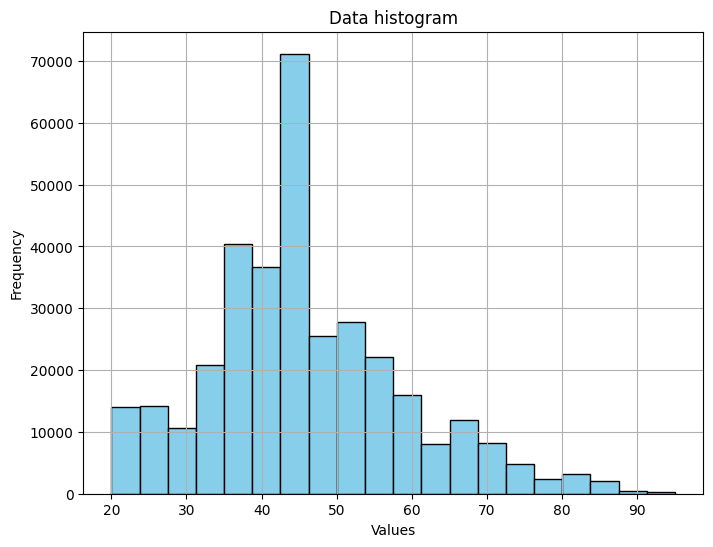

In [ ]:
# Data histogram
plt.figure(figsize=(8, 6))
plt.hist(merged_table_[merged_table_['sex']== 'm']['age'],
         bins=20, color='skyblue', edgecolor='black')
plt.title('Data histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

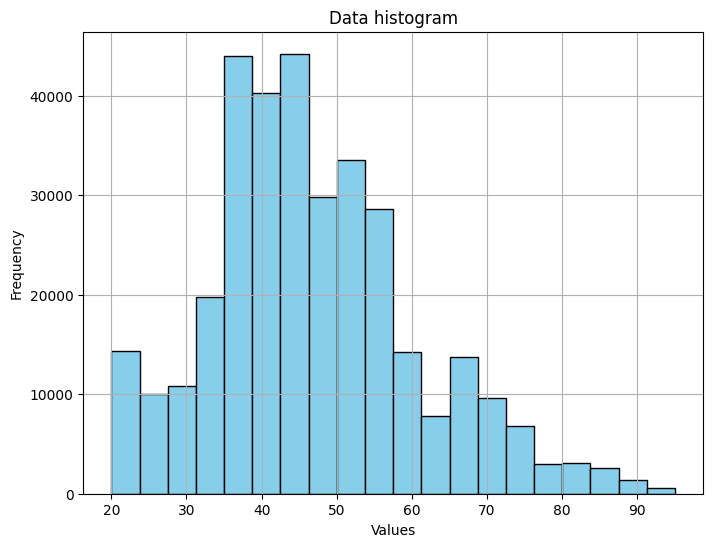

In [ ]:
# Data histogram
plt.figure(figsize=(8, 6))
plt.hist(merged_table_[merged_table_['sex']== 'f']['age'],
         bins=20, color='skyblue', edgecolor='black')
plt.title('Data histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Due to the violations of the assumptions and despite the size of our sample we cannot apply the student test.

# 4.Total turnover

In [ ]:
# Calculating the turnover
total_revenue = merged_table_.groupby('session_id')['price'].sum().sum()

# Afficher le chiffre d'affaires total
print(f"Total turnover: {round(total_revenue, 2)}")

Total turnover: 11853728.68


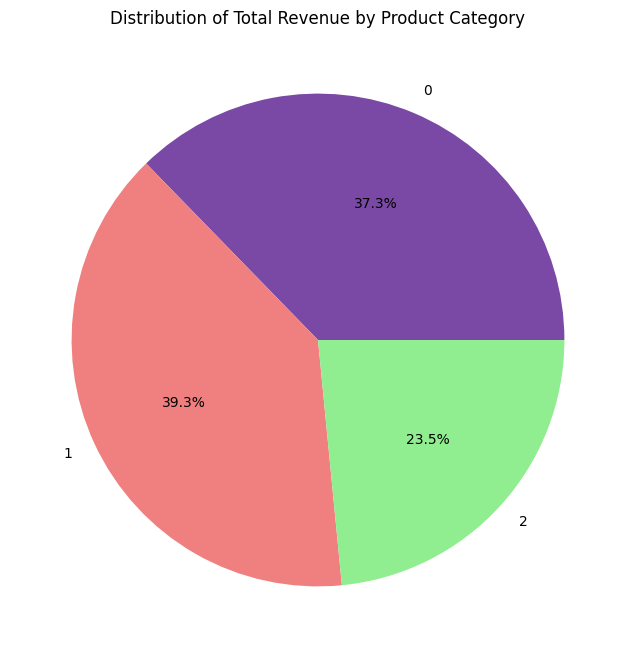

In [ ]:
# Calculate total revenue by product category
total_revenue_categ = merged_table_.groupby('categ')['price'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_revenue_categ, labels=total_revenue_categ.index,
        autopct='%1.1f%%', colors=['#7a49a5', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Total Revenue by Product Category')
plt.show()

We note that category 1 presents the largest share of turnover, followed by category 0 and finally category 2.

Now we will evaluate the inequality in the distribution of turnover between customers to better understand the distribution of economic gain within our customers. And it is using the Lorenz curve for the variable 'price'.

**The Lorenz curve** is a graphic representation of the distribution of a variable (income, wealth, etc.) within a population. It makes it possible to calculate the Gini coefficient, which measures the inequality of this variable in a given population(It measures the area present between the first bisector and the Lorenz curve).

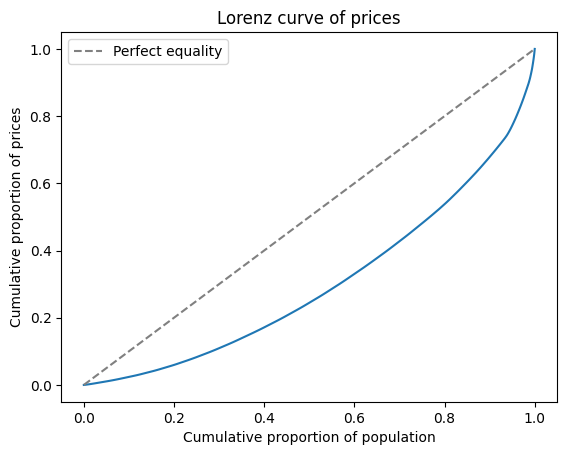

In [ ]:
prices = merged_table_['price'].values
n = len(prices)
lorenz = np.cumsum(np.sort(prices)) / prices.sum()
lorenz = np.append([0],lorenz) # The Lorenz curve starts at 0


# Show plot
plt.show()
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfect equality')
plt.title('Lorenz curve of prices')
plt.xlabel('Cumulative proportion of population')
plt.ylabel('Cumulative proportion of prices')
plt.legend()

plt.show()

We can clearly see through the graph the inequality in the distribution of turnover between customers. And to confirm this we will calculate the Gini index which is a number between 0 and 1, where 0 represents perfect equality (all customers participate in the same way in the turnover) and 1 represents maximum inequality ( one customer participates alone in the turnover and the others do not).

In [ ]:
# Area under the Lorenz curve.
# The first segment (lorenz[0]) is half below 0, we therefore cut it in 2,
# we do the same for the last segment lorenz[-1] which is half above 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

# area between the first bisector and the Lorenz curve
S = 0.5 - AUC
gini = 2*S
gini

0.39547021795694925

According to the curve and the Gini index which is 0.4 we can summarize that there is a weak inequality in the cumulative distribution of the price compared to the equal distribution.

In [ ]:
# Calculate turnover per month
monthly_revenue = merged_table_.groupby(merged_table_['date'].dt.to_period("M")\
                                        )['price'].sum()
print(monthly_revenue.describe())

count        24.000000
mean     493905.361667
std       41208.740111
min      320798.740000
25%      483775.270000
50%      501566.105000
75%      515634.330000
max      535571.500000
Name: price, dtype: float64


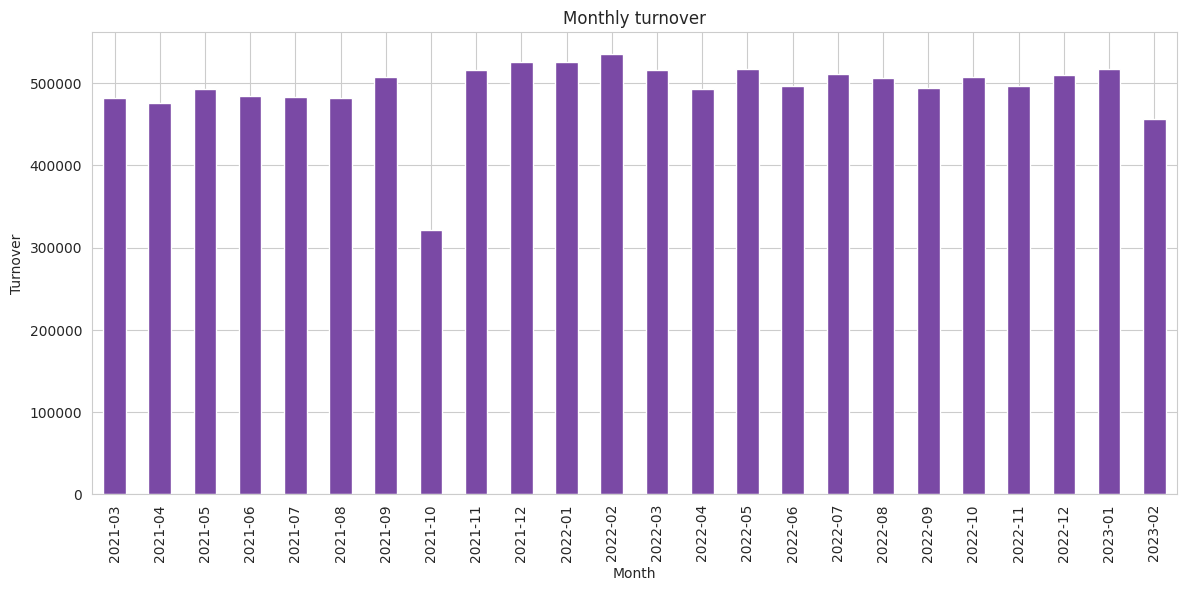

In [ ]:
# Plot a graph for monthly turnover
plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='bar', color='#7a49a5')

plt.title('Monthly turnover')
plt.xlabel('Month')
plt.ylabel('Turnover')
plt.show()


According to this graph, the monthly turnover has not changed much since 03/2021 and until 02/2023 (plus at least 500,000 euros/per month), except for the month of October 2021 where it fell to 300,000 euros.

In [ ]:
# Calculate turnover per day
daily_revenue = merged_table_.groupby(merged_table_['date'].dt.date)['price']\
.sum()
print(daily_revenue.describe())

count      730.000000
mean     16237.984493
std       1847.906447
min       8076.040000
25%      15476.225000
50%      16223.305000
75%      17185.785000
max      20487.680000
Name: price, dtype: float64


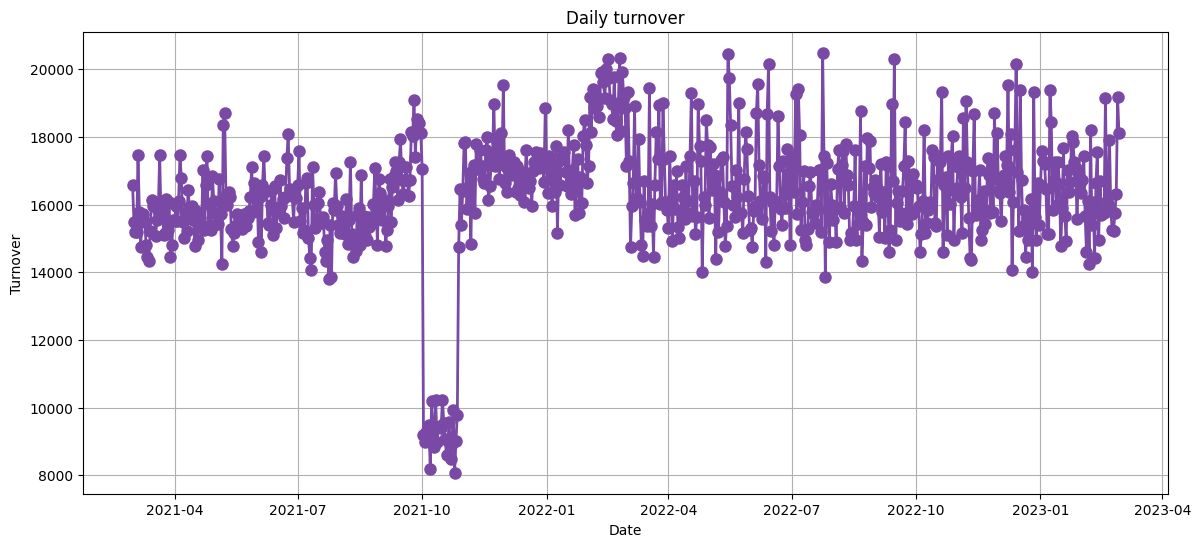

In [ ]:
# Plot a graph for daily turnover
plt.figure(figsize=(14, 6))
daily_revenue.plot(kind='line', marker='o', color='#7a49a5', linestyle='-',
                   linewidth=2, markersize=8)

plt.title('Daily turnover')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.grid(True)
plt.show()

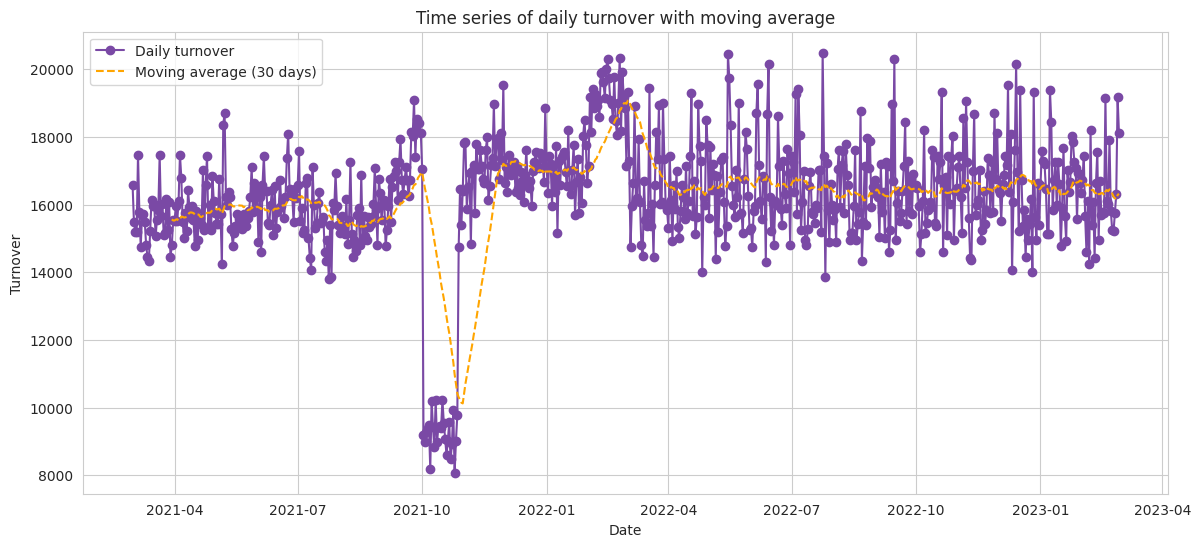

In [ ]:
# Calculate the moving average over a 30 day window
rolling_average = daily_revenue.rolling(window=30).mean()

# Plot the turnover time series with the moving average
plt.figure(figsize=(14, 6))
plt.plot(daily_revenue.index, daily_revenue.values, label='Daily turnover',
         marker='o', linestyle='-', color='#7a49a5')
plt.plot(rolling_average.index, rolling_average.values,
         label='Moving average (30 days)', linestyle='--', color='orange')

# Add titles and axis labels
plt.title('Time series of daily turnover with moving average')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.legend()
plt.grid(True)
plt.show()

We note that the turnover was slightly stable between 03/2021 and 07/2021, but it showed a sudden drop in 10/2021 to increase again in 11/2021 with a small peak around 03/2022 to finally stabilized since 04/2022 and until 03/2023 (slightly higher than 16,000 euros per day).

# 5.RFM Segmentation

RFM Analysis is a data-driven customer behavior segmentation technique where RFM stands for recency, frequency, and Monetary.

The idea is to segment customers based on the date of their last purchase (Recency), how often they bought in the past (Frequency) and how much they spent (Monetary). These three metrics are effective predictors of a customer's willingness to respond to marketing messages and offers.

In [ ]:
def calculateRFM(data):
    """
    Function allowing to generate the three variables Recency,
    Frequency and Currency. Specific to RFM segmentation.

    """

    # Aggregate data by each customer
    rfm = data.groupby(['client_id']).agg({
        'date': lambda x: (today - x.max()).days,
        'session_id': 'count',
        'price': 'sum'})

    # Rename columns
    rfm.rename(columns={'date': 'Recency',
                        'session_id': 'Frequency',
                        'price': 'Monetary'}, inplace=True)
    return rfm

In [ ]:
def hist_rfm(rfm):
    """
    Function allowing to generate histograms of variables R, F and M

    """
    fig = plt.figure(1, figsize=(15, 4))

    # Histogram of Recency variable
    plt.subplot(1, 3, 1)
    sns.distplot(rfm.Recency, label='Recency',
                 bins=int(1 + np.log2(len(rfm))))
    plt.ylabel("%")

    # Histogram of the variable Frequency
    plt.subplot(1, 3, 2)
    sns.distplot(rfm.Frequency, label='Frequency',
                 bins=int(1 + np.log2(len(rfm))))
    plt.ylabel("%")

    # Histogram of the Monetary variable
    plt.subplot(1, 3, 3)
    sns.distplot(rfm.Monetary, label='Monetary',
                 bins=int(1 + np.log2(len(rfm))))
    plt.ylabel("%")
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()

In [ ]:
def boxplot_rfm(rfm):
    """
    Boxplot of variables R, F and M

    """
    fig = plt.figure(1, figsize=(18, 4))

    # Boxplot of variable Recency
    plt.subplot(131)
    sns.boxplot(rfm["Recency"], orient="vertical")

    # Boxplot of variable Frequency
    plt.subplot(132)
    sns.boxplot(rfm["Frequency"], orient="vertical")

    # Boxplot of variable Monetary
    plt.subplot(133)
    sns.boxplot(rfm["Monetary"], orient="vertical")
    plt.show()

In [ ]:
today = merged_table_['date'].max()

In [ ]:
# Applying the RFM Function to df
rfm = calculateRFM(merged_table_)

<ipython-input-48-81b197b85db6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Recency, label='Recency',
<ipython-input-48-81b197b85db6>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Frequency, label='Frequency',
<ipython-input-48-81b197b85db6>:22: UserWarning: 

`distplot` is a d

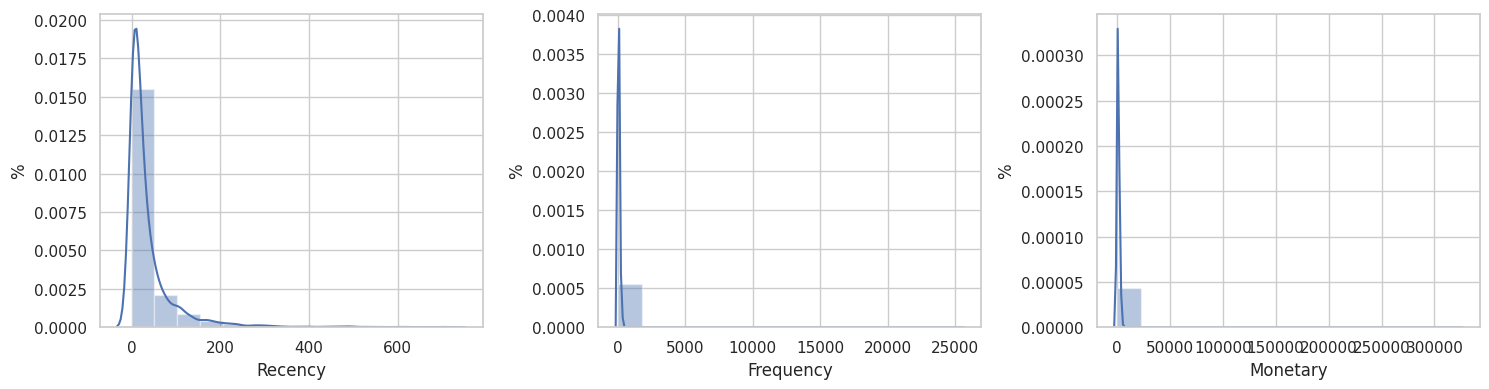

In [ ]:
# Application of the RFM histogram function to df
hist_rfm(rfm)

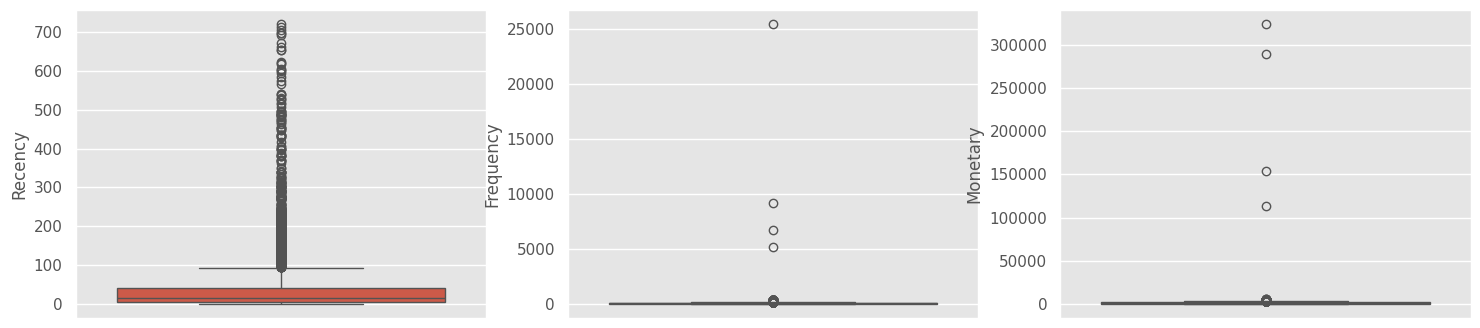

In [ ]:
# Applying the RFM boxplot function to df
boxplot_rfm(rfm)

The histograms of these three variables clearly show their abnormal distribution while the boxplots clearly show the presence of outliers for the Recency.

In [ ]:
def rfm_score(x, quintiles, c):
    """
    Assigns a score between 1 and 5 depending on the location of x by
    compared to quintiles. The larger x is, the greater the score

    """

    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [ ]:
quintiles = rfm[['Recency',
                 'Frequency',
                 'Monetary']].quantile([.2, .4, .6, .8])

In [ ]:
rfm['R'] = pd.qcut(rfm['Recency'], 5, ['5','4','3','2','1']).astype(np.int64)

rfm['F'] = rfm['Frequency'].apply(lambda x:
                                  rfm_score(x, quintiles, 'Frequency'))

rfm['M'] = pd.qcut(rfm['Monetary'], 5, ['5','4','3','2','1']).astype(np.int64)

In [ ]:
def calculSegment(rfm):
    """
    Returns the segment associated with the customer based on their score for
    the R, F and M variables

    """

    if 4 <= rfm["R"] <= 5 and 4 <= rfm["F"] <= 5 and 4 <= rfm["M"] <= 5:
        return "Champions"

    elif 3 <= rfm["R"] <= 5 and 3 <= rfm["F"] <= 5 and 2 <= rfm["M"] <= 5:
        return "Loyal Customers"

    elif 3 <= rfm["R"] <= 5 and 1 <= rfm["F"] <= 3 and 1 <= rfm["M"] <= 3:
        return "Potential Loyalist"

    elif rfm["R"] >= 4 and rfm["F"] <= 2:
        return "Recent Customers"

    elif 3 <= rfm["R"] <= 4 and rfm["F"] <= 1 and rfm["M"] <= 1:
        return "Promising"

    elif 2 <= rfm["R"] <= 3 and 2 <= rfm["F"] <= 3 and 2 <= rfm["M"] <= 3:
        return "Need Attention"

    elif 2 <= rfm["R"] <= 3 and rfm["F"] <= 2 and rfm["M"] <= 2:
        return "About To Sleep"

    elif rfm["R"] <= 1 and 4 <= rfm["F"] <= 5 and 4 <= rfm["M"] <= 5:
        return "Can't Lose Them"

    elif rfm["R"] <= 2 and 2 <= rfm["F"] <= 5 and 2 <= rfm["M"] <= 5:
        return "At Risk"

    elif rfm["R"] <= 2 and rfm["F"] <= 2 and rfm["M"] <= 2:
        return "Lost"

    else:
        return "Others"

In [ ]:
rfm["RFM Score"] = rfm.apply(calculSegment, axis=1)

In [ ]:
rfm.head(5)

,Recency,Frequency,Monetary,R,F,M,RFM Score
client_id,,,,,,,
c_1,44,39,558.18,2,2,4,At Risk
c_10,32,58,1353.60,2,3,2,Need Attention
c_100,161,8,254.85,1,1,5,Others
c_1000,35,125,2261.89,2,5,1,Others
c_1001,5,102,1812.86,4,4,2,Loyal Customers


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, c_1 to c_999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    8600 non-null   int64  
 1   Frequency  8600 non-null   int64  
 2   Monetary   8600 non-null   float64
 3   R          8600 non-null   int64  
 4   F          8600 non-null   int64  
 5   M          8600 non-null   int64  
 6   RFM Score  8600 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 537.5+ KB


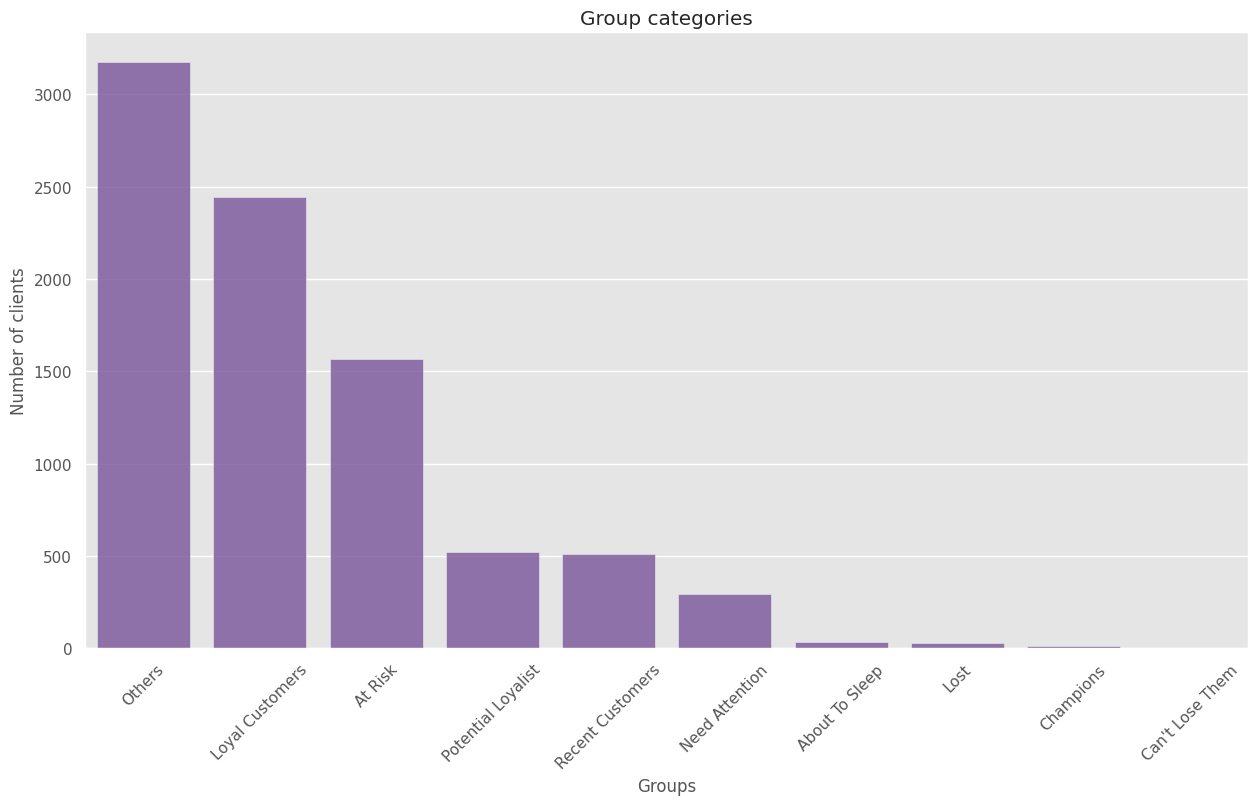

In [ ]:
# To graph RFM score groups
x = list(rfm["RFM Score"].value_counts().index)
y = rfm["RFM Score"].value_counts().values

fig = plt.figure(figsize=(15, 8))
plt.title("Group categories")
plt.xlabel("Groups")
plt.xticks(rotation=45)

plt.ylabel("Number of clients")
sns.barplot(x=x, y=y, alpha=0.8, color='#7a49a5')
plt.show()

According to RFM segmentation, the two dominant categories of customers are Others and Loyal Customers.

___

# 6.Clients


Now we will determine the 10 best and the 10 last customers according to their average basket.

In [ ]:
# Calculate the average basket for each customer taking into account the purchasing session
panier_moyen = merged_table_.groupby(['client_id', 'session_id'])\
['price'].mean().reset_index()

# Calculate the average basket for each customer by averaging over purchasing sessions
panier_moyen_par_client = panier_moyen.groupby('client_id')['price']\
.mean().reset_index()

# Sort customers by average basket
clients_tries = panier_moyen_par_client.sort_values(by='price', ascending=False)

In [ ]:
# Show top 10 customers
clients_tries.head(10)

,client_id,price
3925,c_4540,181.990000
3761,c_4391,181.990000
4875,c_5398,146.437000
1521,c_2369,137.930000
964,c_1868,129.695714
6508,c_6870,127.351875
4203,c_4791,126.665000
2409,c_317,125.454773
7262,c_755,124.612500
7696,c_7941,120.580000


In [ ]:
# Show the 10 worst customers
clients_tries.tail(10)

,client_id,price
657,c_1591,6.490000
4984,c_5496,6.365667
8151,c_8351,6.310000
8480,c_890,6.080000
4206,c_4794,5.832222
1515,c_2363,5.721000
750,c_1675,5.570000
7889,c_8114,4.990000
7798,c_8032,4.410000
7918,c_8140,4.150000
